In [1]:
import sys
sys.path.append('/import/silo2/aloe8475/Documents/edamame')

In [2]:
from scipy.io import loadmat, savemat
from scipy.stats import kurtosis, skew

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import datetime
import networkx as nx
from edamame import *
from tqdm.notebook import tqdm_notebook
import os
import edamame.core.wires as wires
from random import choice
from IPython.core.debugger import set_trace
import nct
import bct
import pandas as pd
 
import pickle 
import _pickle as cPickle
import gzip
def compressed_pickle(obj, filename,protocol=-1):
    with gzip.open(filename, 'wb') as f:
        cPickle.dump(obj, f, protocol)
def decompress_pickle(file):
    with gzip.open(file, 'rb') as f:
        loaded_object = cPickle.load(f)
        return loaded_object

# Load Data

In [3]:
# [dfNWN,dfWS,dfHNW,dfElegans,dfCrossbar,dfBA]=decompress_pickle(r'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/CrossNetworkResults')
[dfNWN,dfElegans,dfCrossbar,dfBA,dfHNW]=decompress_pickle(r'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/CrossNetworkResults')

In [4]:
onAmp=[0.2,0.5,0.75,1,1.25,1.5,1.75,2,3,5,10]

In [ ]:
networkType='NWN'

In [ ]:
# if networkType == 'HNW':
# #     name=r'/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/HierarchicalNetworks.pkl'
#     name=r'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/HierarchicalNetworks_HMN1.pkl'
#     file = open(name, 'rb')
#     [HNW] = pickle.load(file)

#     name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Hierarchical Results/VoltageSweep_AllNetworks_HNW_NLT.pkl'
#     print('Loading Hierarchical Voltage Sweep Results')
#     file = open(name, 'rb')
#     [results] = pickle.load(file)
    
#     name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Hierarchical Results/VoltageSweep_AllNetworks_HNW_MC.pkl'
#     file = open(name, 'rb')
#     [results_MC] = pickle.load(file)
    
if networkType == 'Crossbar':
    ### Barpartite
    name=r'/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/barpartite_LinearTransformation_2V.pkl'
    print('Loading Crossbar')
    file = open(name, 'rb')
    [crossbar] = pickle.load(file)
    
    name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Crossbar_NLT+MC.pkl'
    print('Loading NLT Voltage Sweep Results')
    file = open(name, 'rb')
    [results,results_MC] = pickle.load(file)

elif networkType == 'Random':
    ### C Barpartite
    name=r'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Random Networks/RandomNW_VaryingDensity_SameDegreeDistAsNWN'
    print('Loading Random Networks')
    Random = decompress_pickle(name)

    name=r'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Random Networks/RandomNW_VaryingDensity_SameDegreeDistAsNWN_NLTresults'
    print('Loading Random Networks')
    results = decompress_pickle(name)

    name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_AllNetworks_BA_MC.pkl'
    print('Loading BA Voltage Sweep MC Results')
    file = open(name, 'rb')
    [resultsMC] = pickle.load(file)
    
elif networkType == 'Elegans':
    ### C Elegans
    name=r'/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/elegans_LinearTransformation_2V.pkl'
    print('Loading Elegans Networks')
    file = open(name, 'rb')
    [Elegans] = pickle.load(file)
    
    name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/VoltageSweep_Elegans_NLT+MC.pkl'
    print('Loading NLT Voltage Sweep Results')
    file = open(name, 'rb')
    [results,results_MC] = pickle.load(file)
    
elif networkType == 'NWN':
    
    name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/DensityNWNs/VoltageSweep_DensityNetworks_NWN_NLT.pkl'
    print('Loading NLT Voltage Sweep Results')
    file = open(name, 'rb')
    [results] = pickle.load(file)

    name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/DensityNWNs/VoltageSweep_DensityNetworks_NWN_MC.pkl'
    print('Loading MC Voltage Sweep Results')
    file = open(name, 'rb')
    [results_MC,idx] = pickle.load(file)

    # name='/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/VaryingDensity300NW_NWN.pkl'
    name='/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/VaryingDensity300NWset2_NWN.pkl'
    print('Loading NWN Networks, MC and NLT Results')
    file = open(name, 'rb')
    [NWN] = pickle.load(file)

print('Loaded')

print('Loading Graph Theory Analysis')
#Graph Theory:
#NWN Analysis
if networkType != 'WS' :
    Network=[]
    if networkType =='NWN':
        for i in range(len(NWN)):
            for j in range(len(NWN[i])):
                Network.append(NWN[i][j])
    elif networkType=='Elegans':
        Network.append(Elegans)
    elif networkType=='Crossbar':
        Network.append(crossbar)
    elif networkType =='Random':
        for i in range(len(Random)):
            Network.append(Random[i])
    else:
        for i in range(len(HNW)):
            Network.append(HNW[i])
        
    import pandas as pd

 
    centroid=[]
    wireLen=[]
    dispersion=[]
    degree=[]
    avgDeg=[]
    mod=[]
    sw=[]
    pcoeff=[]
    mz=[]
    skewDeg=[]
    sp_amp=[]
    graphs=[]
    spl=[]
    density=[]
    circuitRank=[]
    centrality=[]
    dCentrality=[]
    adjMat=[]
    for i in tqdm(range(len(Network))):   
        gamma=np.linspace(0,1,10)
        ci1=[None]*len(gamma)
        q1=[None]*len(gamma)
        for k in range(len(gamma)):
             ci1[k],q1[k]=nct.community_louvain(Network[i]['adj_matrix'],gamma=gamma[k])
        ci=np.round(np.mean(ci1,axis=0))
        q=np.mean(q1)
        set_trace()
        temp=getFarthestPairing(Network[i]['adj_matrix'])
        adjMat.append(Network[i]['adj_matrix'])
        spl.append(nx.shortest_path_length(Network[i]['G'],temp[0],temp[1]))
        if networkType=='NWN':
            centroid.append(Network[i]['centroid_dispersion'])
            wireLen.append(Network[i]['avg_length'])
            dispersion.append(Network[i]['dispersion'])
            sp_amp.append(Network[i]['sp_amp'])
        avgDeg.append((np.mean(np.asarray(Network[i]['G'].degree())[:,1])))
        degree.append(np.asarray(Network[i]['G'].degree())[:,1])
        mod.append(Network[i]['Graph Theory']['Modularity Score'])
        sw.append(Network[i]['Graph Theory']['Small World'])
        pcoeff.append(Network[i]['Graph Theory']['PCoeff'])
        mz.append(Network[i]['Graph Theory']['MZ'])
        skewDeg.append((skew(np.asarray(Network[i]['G'].degree())[:,1])))
        density.append(nx.density(Network[i]['G']))
        graphs.append(Network[i]['G'])
        centrality.append(nx.betweenness_centrality(Network[i]['G']))
        dCentrality.append(nx.degree_centrality(Network[i]['G']))
        #circuit rank = Edges - (Vertices - 1)
        circuitRank.append(Network[i]['G'].number_of_edges()-(Network[i]['G'].number_of_nodes()-1))


#Centrality
bwCentrality=[]
degCentrality=[]
for i in range(len(centrality)):
    bwCentrality.append(list(centrality[i].values()))
    degCentrality.append(list(dCentrality[i].values()))

#Accuracy    

#Calculate Best Voltage for each network:
onAmp=[0.2,0.5,0.75,1,1.25,1.5,1.75,2,3,5,10]

----

In [ ]:
# modAll=np.tile(mod,(11,1))
# PCAll=np.tile(pcoeff,(11,1))
# MZAll=np.tile(mz,(11,1))
# swAll=np.tile(sw,(11,1))
# bwCentralityAll=np.tile(bwCentrality,(11,1))
# degCentralityAll=np.tile(degCentrality,(11,1))
# skewDegAll=np.tile(skewDeg,(11,1))
# avgDegAll=np.tile(avgDeg,(11,1))
# degreeAll=np.tile(degree,(11,1))
# graphsAll=np.tile(graphs,(11,1))
# adjMatAll=[]
# for i in range(11):
#     adjMatAll.append(adjMat)

# s=pd.Series(adjMatAll)
# s=s.to_frame(name='AdjMat')
# s1=pd.Series(graphsAll.tolist())
# s1=s1.to_frame(name='Graphs')
# s2=pd.Series(degreeAll.tolist())
# s2=s2.to_frame(name='Degree')
# s3=pd.Series(avgDegAll.tolist())
# s3=s3.to_frame(name='AvgDeg')
# s4=pd.Series(skewDegAll.tolist())
# s4=s4.to_frame(name='SkewDeg')
# s5=pd.Series(degCentralityAll.tolist())
# s5=s5.to_frame(name='DegCentrality')
# s6=pd.Series(bwCentralityAll.tolist())
# s6=s6.to_frame(name='BWCentrality')
# s7=pd.Series(swAll.tolist())
# s7=s7.to_frame(name='SW')
# s8=pd.Series(modAll.tolist())
# s8=s8.to_frame(name='Modularity')
# s9=pd.Series(PCAll.tolist())
# s9=s9.to_frame(name='PCoeff')
# s10=pd.Series(MZAll.tolist())
# s10=s10.to_frame(name='MZ')
# s11=pd.Series(allVolts.tolist())
# s11=s11.to_frame(name='NLT')
# s12=pd.Series(allVoltsMC.tolist())
# s12=s12.to_frame(name='MC')

# dfHNW=pd.concat([s,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12],axis=1)

---

In [ ]:
# ### BetaSweep Networks:

# name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/WS_BetaSweepNetworks.pkl' #2V for both NLT and MC

# # name='networks_NonlinearTransformation+6VMC.pkl'
# print('Loading WS Networks, MC and NLT Results')
# file = open(name, 'rb')
# #     [ASN300,cluster1,cluster2,cluster3,time_index,nodesList] = pickle.load(file)
# #     [ASN300,cluster1,cluster2,cluster3] = pickle.load(file)
# [WS] = pickle.load(file)

# print('Loaded')


In [ ]:
# ws_acc=[]
# ws_mc=[]
# for i in range(len(WS)):
#     for j in range(len(WS[i])):
#         for k in range(len(WS[i][j])):
#             ws_acc.append(np.nanmax(WS[i][j][k]['Accuracy']['Linear Transformation']))
#             ws_mc.append(WS[i][j][k]['Accuracy']['Memory Capacity'])

In [ ]:
# #Convert Data to Dataframe (pandas)
# import pandas as pd
# ws_degree=[]
# ws_avgDeg=[]
# ws_mod=[]
# ws_sw=[]
# ws_pcoeff=[]
# ws_mz=[]
# ws_skewDeg=[]
# ws_graphs=[]
# ws_spl=[]
# ws_density=[]
# ws_centrality=[]
# ws_dCentrality=[]
# for i in tqdm(range(len(WS))):
#     for j in tqdm(range(len(WS[i]))):
#         for k in tqdm(range(len(WS[i][j]))):
#             adjMat=nx.adjacency_matrix(WS[i][j][k]['G']).todense()
#             temp=getFarthestPairing(adjMat)
#             ws_spl.append(nx.shortest_path_length(WS[i][j][k]['G'],temp[0],temp[1]))
#             ws_avgDeg.append((np.mean(np.asarray(WS[i][j][k]['G'].degree())[:,1])))
#             ws_degree.append(np.asarray(WS[i][j][k]['G'].degree())[:,1])
#             ws_mod.append(WS[i][j][k]['Graph Theory']['Modularity Score'])
#             ws_sw.append(WS[i][j][k]['Graph Theory']['Small World'])
#             ws_pcoeff.append(WS[i][j][k]['Graph Theory']['PCoeff'])
#             ws_mz.append(WS[i][j][k]['Graph Theory']['MZ'])
#             ws_skewDeg.append((skew(np.asarray(WS[i][j][k]['G'].degree())[:,1])))
#             ws_density.append(nx.density(WS[i][j][k]['G']))
#             ws_graphs.append(WS[i][j][k]['G'])
#             ws_centrality.append(nx.betweenness_centrality(WS[i][j][k]['G']))
#             ws_dCentrality.append(nx.degree_centrality(WS[i][j][k]['G']))

In [ ]:
# bwCentrality=[]
# degCentrality=[]
# for i in range(len(ws_centrality)):
#     bwCentrality.append(list(ws_centrality[i].values()))
#     degCentrality.append(list(ws_dCentrality[i].values()))

In [ ]:
# dfWS=pd.DataFrame({'G':ws_graphs,'NLT':ws_acc,'MC':ws_mc,'MOD':ws_mod,'SW':ws_sw,'DEG':ws_degree,'AVGDEG':ws_avgDeg,'DEGSKEW':ws_skewDeg,'DEGCENTRALITY':degCentrality,'PCOEFF':ws_pcoeff,'MZ':ws_mz,'BWCENTRALITY':bwCentrality})

In [ ]:
# compressed_pickle([dfNWN,dfElegans,dfCrossbar,dfBA,dfHNW],r'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/CrossNetworkResults')

## Network Measures

In [5]:
#Separate Data into voltages:
NLTMax=[]
NLTMin=[]
MCMax=[]
MCMin=[]
for i in range(len(dfNWN)):
    NLTMax.append(np.max([np.max(dfBA.iloc[i].NLT),np.max(dfHNW.iloc[i].NLT),np.max(dfNWN.iloc[i].NLT),dfElegans['NLT'][0][i],dfCrossbar['NLT'][0][i]]))
    NLTMin.append(np.min([np.min(dfBA.iloc[i].NLT),np.min(dfHNW.iloc[i].NLT),np.min(dfNWN.iloc[i].NLT),dfElegans['NLT'][0][i],dfCrossbar['NLT'][0][i]]))
    MCMax.append(np.max([np.max(dfBA.iloc[i].MC),np.max(dfHNW.iloc[i].MC),np.max(dfNWN.iloc[i].MC),dfElegans['MC'][0][i],dfCrossbar['MC'][0][i]]))
    MCMin.append(np.min([np.min(dfBA.iloc[i].MC),np.min(dfHNW.iloc[i].MC),np.min(dfNWN.iloc[i].MC),dfElegans['MC'][0][i],dfCrossbar['MC'][0][i]]))

In [6]:
NWNNLT=[]
NWNMC=[]
NWNMOD=[]
NWNSW=[]
NWNAVGDEG=[]
NWNPC=[]
NWNMZ=[]
NWNDEGCENT=[]
NWNGRAPH=[]
CrossbarMC=[]
CrossbarNLT=[]
CrossbarMOD=[]
CrossbarSW=[]
CrossbarAVGDEG=[]
ElegansNLT=[]
ElegansMC=[]
ElegansMOD=[]
ElegansSW=[]
ElegansAVGDEG=[]
ElegansPC=[]
ElegansMZ=[]
ElegansDEGCENT=[]
BANLT=[]
BAMC=[]
BASW=[]
BAMOD=[]
BAAVGDEG=[]
BAPC=[]
BAMZ=[]
BADEGCENT=[]
BAGRAPH=[]
HNWNLT=[]
HNWMC=[]
HNWSW=[]
HNWMOD=[]
HNWAVGDEG=[]
HNWPC=[]
HNWMZ=[]
HNWDEGCENT=[]
HNWGRAPH=[]
NWNDENSITY=[[None]*300 for i in range(len(dfNWN))] 
for i in range(len(dfNWN)):
    NWNNLT.append((dfNWN.iloc[i].NLT))
    NWNMC.append((dfNWN.iloc[i].MC))
    NWNMOD.append(dfNWN.iloc[i].Modularity)
    NWNSW.append(dfNWN.iloc[i].SW)
    NWNAVGDEG.append(dfNWN.iloc[i].AvgDeg)
    NWNPC.append(dfNWN.iloc[i].PCoeff)
    NWNMZ.append(dfNWN.iloc[i].MZ)
    NWNDEGCENT.append(dfNWN.iloc[i].DegCentrality)
    NWNGRAPH.append(dfNWN.iloc[i].Graphs)
    for j in range(len(dfNWN.iloc[i].Graphs)):
        NWNDENSITY[i][j]=nx.density(dfNWN.iloc[i].Graphs[j])
    
    ElegansNLT.append((dfElegans['NLT'][0][i]))
    ElegansMC.append((dfElegans['MC'][0][i]))
    ElegansMOD.append((dfElegans['MOD']))
    ElegansSW.append((dfElegans['SW']))
    ElegansAVGDEG.append((dfElegans['AVGDEG']))
    ElegansPC.append((dfElegans['PCOEFF']))
    ElegansMZ.append((dfElegans['MZ']))
    ElegansDEGCENT.append(dfElegans['DEGCENTRALITY'])

    CrossbarNLT.append((dfCrossbar['NLT'][0][i]))
    CrossbarMC.append((dfCrossbar['MC'][0][i]))
    CrossbarMOD.append((dfCrossbar['MOD']))
    CrossbarSW.append((dfCrossbar['SW']))
    CrossbarAVGDEG.append((dfCrossbar['AVGDEG']))
    
    BANLT.append((dfBA.iloc[i].NLT))
    BAMC.append((dfBA.iloc[i].MC))
    BAMOD.append(dfBA.iloc[i].Modularity)
    BASW.append(dfBA.iloc[i].SW)
    BAAVGDEG.append(dfBA.iloc[i].AvgDeg)
    BAPC.append(dfBA.iloc[i].PCoeff)
    BAMZ.append(dfBA.iloc[i].MZ)
    BADEGCENT.append(dfBA.iloc[i].DegCentrality)
    BAGRAPH.append(dfBA.iloc[i].Graphs)
    
    HNWNLT.append((dfHNW.iloc[i].NLT))
    HNWMC.append((dfHNW.iloc[i].MC))
    HNWMOD.append(dfHNW.iloc[i].Modularity)
    HNWSW.append(dfHNW.iloc[i].SW)
    HNWAVGDEG.append(dfHNW.iloc[i].AvgDeg)
    HNWPC.append(dfHNW.iloc[i].PCoeff)
    HNWMZ.append(dfHNW.iloc[i].MZ)
    HNWDEGCENT.append(dfHNW.iloc[i].DegCentrality)
    HNWGRAPH.append(dfHNW.iloc[i].Graphs)

standardNWNNLT=[]
standardNWNMC=[]
standardCrossbarMC=[]
standardCrossbarNLT=[]
standardElegansNLT=[]
standardElegansMC=[]
standardBAMC=[]
standardBANLT=[]
standardHNWMC=[]
standardHNWNLT=[]

for i in range(len(dfNWN)):
    standardNWNNLT.append((dfNWN.iloc[i].NLT-NLTMin[i])/(NLTMax[i]-NLTMin[i]))
    standardNWNMC.append((dfNWN.iloc[i].MC-MCMin[i])/(MCMax[i]-MCMin[i]))
    standardBANLT.append((dfBA.iloc[i].NLT-NLTMin[i])/(NLTMax[i]-NLTMin[i]))
    standardBAMC.append((dfBA.iloc[i].MC-MCMin[i])/(MCMax[i]-MCMin[i]))
    standardHNWNLT.append((dfHNW.iloc[i].NLT-NLTMin[i])/(NLTMax[i]-NLTMin[i]))
    standardHNWMC.append((dfHNW.iloc[i].MC-MCMin[i])/(MCMax[i]-MCMin[i]))
    standardElegansNLT.append((dfElegans['NLT'][0][i]-NLTMin[i])/(NLTMax[i]-NLTMin[i]))
    standardElegansMC.append((dfElegans['MC'][0][i]-MCMin[i])/(MCMax[i]-MCMin[i]))
    standardCrossbarNLT.append((dfCrossbar['NLT'][0][i]-NLTMin[i])/(NLTMax[i]-NLTMin[i]))
    standardCrossbarMC.append((dfCrossbar['MC'][0][i]-MCMin[i])/(MCMax[i]-MCMin[i]))

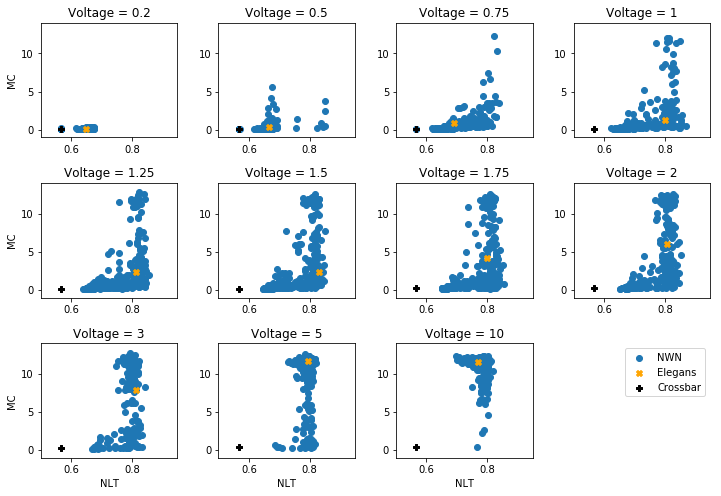

In [7]:
fig, axes = plt.subplots(3,4,figsize=(12,8))
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.3)

i=0
for ax in axes.flat:
    if i < len(dfNWN):
        h=ax.scatter(NWNNLT[i],NWNMC[i],label='NWN')
#         h3=ax.scatter(BANLT[i],BAMC[i],marker='D',label='BA',c='r')
#         h4=ax.scatter(HNWNLT[i],HNWMC[i],marker='p',label='Hierarchical',c='g')
        h1=ax.scatter(ElegansNLT[i],ElegansMC[i],marker='X',label='Elegans',c='orange')
        h2=ax.scatter(CrossbarNLT[i],CrossbarMC[i],marker='P',label='Crossbar',c='k')
        ax.set_title('Voltage = ' + str(onAmp[i]))
        ax.set_xlim([0.5,0.95])
        ax.set_ylim([-1,14])
        if i == 0 or i == 4 or i == 8:
            ax.set_ylabel('MC')
        if i == 8 or i == 9 or i == 10:
            ax.set_xlabel('NLT')
    else:
        plt.legend([h,h1,h2],['NWN','Elegans','Crossbar'])#,'BA','Hierarchical'],loc='upper left')
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
    i = i + 1
    
# plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/All NWN+Elegans+Crossbar VSweep - NLT vs MC.png',format='png',dpi=600)

### SW + MOD

In [ ]:
fig, axes = plt.subplots(3,4,figsize=(12,8))
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.3)

taskType='MC'
metric='SW'#AvgDeg,SW,Mod

if metric == 'Mod':
    nwn=NWNMOD
    ba=BAMOD
    hnw=HNWMOD
    elegans=ElegansMOD
    crossbar=CrossbarMOD
elif metric=='AvgDeg':
    nwn=NWNAVGDEG
    ba=BAAVGDEG
    hnw=HNWAVGDEG
    elegans=ElegansAVGDEG
    crossbar=CrossbarAVGDEG
else:
    nwn=NWNSW
    ba=BASW
    hnw=HNWSW
    elegans=ElegansSW
    crossbar=CrossbarSW
i=0
for ax in axes.flat:
    if i < len(dfNWN):
        if taskType == 'MC':
            idxNWNMC=np.argmax(NWNMC[i])
            idxBAMC=np.argmax(BAMC[i])
            idxHNWMC=np.argmax(HNWMC[i])
            h=ax.scatter(nwn[i],NWNMC[i],label='NWN',c=NWNDENSITY[i])
#             h3=ax.scatter(ba[i],BAMC[i],marker='D',label='BA',c='r')
#             h4=ax.scatter(hnw[i],HNWMC[i],marker='p',label='Hierarchical',c='g',alpha=0.3)
#             h1=ax.scatter(elegans[i],ElegansMC[i],marker='X',label='Elegans',c='orange')
#             h2=ax.scatter(crossbar[i],CrossbarMC[i],marker='P',label='Crossbar',c='k')
            ax.set_ylim([-1,14]) #MC
        else:
            idxNWNNLT=np.argmax(NWNNLT[i])
            idxBANLT=np.argmax(BANLT[i])
            idxHNWNLT=np.argmax(HNWNLT[i])
            h=ax.scatter(nwn[i],NWNNLT[i],label='NWN',c=NWNDENSITY[i])
#             ax.colorbar()

#             h3=ax.scatter(ba[i],BANLT[i],marker='D',label='BA',c='r')
#             h4=ax.scatter(hnw[i],HNWNLT[i],marker='p',label='Hierarchical',c='g',alpha=0.3)
#             h1=ax.scatter(elegans[i],ElegansNLT[i],marker='X',label='Elegans',c='orange')
#             h2=ax.scatter(crossbar[i],CrossbarNLT[i],marker='P',label='Crossbar',c='k')
            ax.set_ylim([0.5,0.95]) #NLT
#         ax.set_xlim([-0.1,1])
        ax.set_title('Voltage = ' + str(onAmp[i]))
        if i == 0 or i == 4 or i == 8:
            ax.set_ylabel(taskType)
        if i == 8 or i == 9 or i == 10:
            if metric == 'Mod':
                ax.set_xlabel('Modularity (q)')
            elif metric =='AvgDeg':
                ax.set_xlabel('Mean Degree')
            else:
                ax.set_xlabel('Small Worldness')
    else:
#         plt.legend([h,h1,h2],['NWN','Elegans','Crossbar'])#,'BA','Hierarchical'],loc='upper left')
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
    i = i + 1
    
plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/All NWN VSweep - '+metric+' vs '+taskType+'.png',format='png',dpi=600)

In [ ]:
fig,axes=plt.subplots(3,4,figsize=(12,8))
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.3)

i = 0
for row in range(3):
    for col in range(4):
        ax=axes[row,col]
        if i < 11:
            ax.set_title('Voltage = ' + str(onAmp[i]))
            a=ax.scatter(NWNMOD[i],NWNAVGDEG[i],c=NWNNLT[i],marker='o',label='NWN',vmin=0.55,vmax=0.86)#np.round(onAmpAll[maxID,0]/spl,1))
            a1=ax.scatter(BAMOD[i],BAAVGDEG[i],c=BANLT[i],marker='D',label='BA',vmin=0.55,vmax=0.86)#np.round(onAmpAll[maxID,0]/spl,1))
            a2=ax.scatter(HNWMOD[i],HNWAVGDEG[i],c=HNWNLT[i],marker='p',label='Hierachical',vmin=0.55,vmax=0.86)#np.round(onAmpAll[maxID,0]/spl,1))
            if col==0:
                ax.set_ylabel('Avg Degree')
            if row==2:
                ax.set_xlabel('Modularity')
            i = i + 1
        else:
            plt.legend([a,a1,a2],['NWN','BA','Hierarchical'],loc='upper left')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)
            cbaxes = fig.add_axes([0.93, 0.1, 0.03, 0.8]) 
            cb=fig.colorbar(a,cax=cbaxes,shrink=0.6,label='NLT')
plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/NWN+BA+HNW VSweep - AvgDeg vs Mod.png',format='png',dpi=600)

### DENSITY

In [8]:
#Network Densities
densityBA=[]
densityNWN=[]
densityHNW=[]
for i in range(len(dfBA['Graphs'][0])):
    densityBA.append(nx.density(dfBA['Graphs'][0][i]))
    densityNWN.append(nx.density(dfNWN['Graphs'][0][i]))
    densityHNW.append(nx.density(dfHNW['Graphs'][0][i]))
densityElegans=nx.density(dfElegans['G'][0])

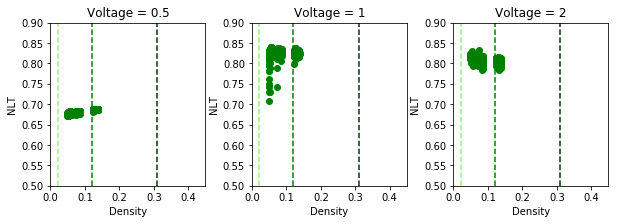

In [9]:
#plot densities
fig,axes=plt.subplots(1,3,figsize=(10,3))
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.3)
indices=[1,3,7]
count=0
for ax in tqdm(axes.flat):
    i = indices[count]
    ax.set_title('Voltage = ' + str(onAmp[i]))
#     ax.scatter(densityBA,BANLT[i],c='r')
#     ax.axvline(x=densityBA[np.argmax(BANLT[i])],linestyle='--',c='r')
#     ax.axvline(x=densityNWN[np.argmin(NWNNLT[3])],linestyle='--',c='#ff474c')
#     ax.axvline(x=0.31,linestyle='--',c='#840000')

#         ax.scatter(densityNWN,NWNNLT[i])
#         ax.axvline(x=densityNWN[np.argmax(NWNNLT[3])],linestyle='--',c='b')
#         ax.axvline(x=densityNWN[np.argmin(NWNNLT[3])],linestyle='--',c='#95d0fc')
#         ax.axvline(x=0.31,linestyle='--',c='#00035b')

    ax.scatter(densityHNW,HNWNLT[i],c='g')
    ax.axvline(x=densityNWN[np.argmax(NWNNLT[3])],linestyle='--',c='g')
    ax.axvline(x=densityNWN[np.argmin(NWNNLT[3])],linestyle='--',c='#96f97b')
    ax.axvline(x=0.31,linestyle='--',c='#033500')

#         ax.scatter(densityElegans,ElegansNLT[i],c='orange')
    ax.set_ylim([0.5,0.9])
    ax.set_xlim([0,0.45])

#     if i == 8 or i == 9 or i == 10:
    ax.set_xlabel('Density')
#     if i == 0 or i == 4 or i == 8:
    ax.set_ylabel('NLT')
# 
    count=count+1
#     else:
#         ax.set_frame_on(False)
#         ax.set_yticklabels([])
#         ax.set_xticklabels([])
#         ax.set_yticks([])
#         ax.set_xticks([])
# plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/HNW Networks Density Comparison - Low Peak High - 0p5 1 2VSweep - NLT vs Density',dpi=300)  
# plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/HNW Networks Peak Densities - 0p5 1 2VSweep - NLT vs Density',dpi=300)  


### Compare Sections with Similar Mod, SW and Density across networks:

In [10]:
#Define DataFrames
dfDensity=pd.DataFrame({'HighDensity':{'BA':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]},
                                          'NWN':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]},
                                          'HNW':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]}},
                          'LowDensity':{'BA':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]},
                                         'NWN':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]},
                                         'HNW':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]}},
                          'PeakDensity':{'BA':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]},
                                          'NWN':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]},
                                          'HNW':{'GRAPHS':[],'NLT':[],'MC':[],'MOD':[],'SW':[],'Density':[],'PC':[],'MZ':[]}}})

In [11]:
# control by Mod:
idxMODHNW=[];idxLowModHNW=[];idxMedModHNW=[]
idxMODNWN=[];idxLowModNWN=[];idxMedModNWN=[]
idxMODBA=[];idxLowModBA=[];idxMedModBA=[]
for i in range(len(NWNMOD[0])):
    idxMODNWN.append(NWNMOD[0][i]>0.75)
    idxMODHNW.append(HNWMOD[0][i]>0.75)
    idxMODBA.append(BAMOD[0][i]>0.75)
# for i in range(len(NWNMOD[0])):
#     idxLowModNWN.append(NWNMOD[0][i]<0.35)
#     idxLowModHNW.append(HNWMOD[0][i]<0.35)
#     idxLowModBA.append(BAMOD[0][i]<0.35)
# for i in range(len(NWNMOD[0])):
#     idxMedModNWN.append(0.4<NWNMOD[0][i]<0.66)
#     idxMedModHNW.append(0.4<HNWMOD[0][i]<0.66)
#     idxMedModBA.append(0.4<BAMOD[0][i]<0.66)

# #similar Mod to C Elegans:
# idxMODHNW=[]
# idxMODNWN=[]
# idxMODBA=[]
# for i in range(len(NWNMOD[0])):
#     idxMODNWN.append(NWNMOD[0][i]==ElegansMOD[0][0] or (ElegansMOD[0][0]+0.05)>NWNMOD[0][i]>(ElegansMOD[0][0]-0.05))
#     idxMODHNW.append(HNWMOD[0][i]==ElegansMOD[0][0] or (ElegansMOD[0][0]+0.05)>HNWMOD[0][i]>(ElegansMOD[0][0]-0.05))
#     idxMODBA.append(BAMOD[0][i]==ElegansMOD[0][0] or (ElegansMOD[0][0]+0.05)>BAMOD[0][i]>(ElegansMOD[0][0]-0.05))

In [12]:
#control by SW:
# idxHighSWHNW=[];idxLowSWHNW=[];idxMedSWHNW=[]
# idxHighSWNWN=[];idxLowSWNWN=[];idxMedSWNWN=[]
# idxHighSWBA=[];idxLowSWBA=[];idxMedSWBA=[]
# for i in range(len(NWNSW[0])):
#     idxHighSWNWN.append(NWNSW[0][i]>0.75)
#     idxHighSWHNW.append(HNWSW[0][i]>0.75)
#     idxHighSWBA.append(BASW[0][i]>0.75)
# for i in range(len(NWNSW[0])):
#     idxLowSWNWN.append(NWNSW[0][i]<0.35)
#     idxLowSWHNW.append(HNWSW[0][i]<0.35)
#     idxLowSWBA.append(0.19<BASW[0][i]<0.35)
# for i in range(len(NWNSW[0])):
#     idxMedSWNWN.append(0.4<NWNSW[0][i]<0.66)
#     idxMedSWHNW.append(0.4<HNWSW[0][i]<0.66)
#     idxMedSWBA.append(0.4<BASW[0][i]<0.66)

#similar SW to C Elegans:
idxSWHNW=[]
idxSWNWN=[]
idxSWBA=[]
for i in range(len(NWNSW[0])):
    idxSWNWN.append(NWNSW[0][i]==ElegansSW[0][0] or (ElegansSW[0][0]+0.05)>NWNSW[0][i]>(ElegansSW[0][0]-0.05))
    idxSWHNW.append(HNWSW[0][i]==ElegansSW[0][0] or (ElegansSW[0][0]+0.05)>HNWSW[0][i]>(ElegansSW[0][0]-0.05))
    idxSWBA.append(BASW[0][i]==ElegansSW[0][0] or (ElegansSW[0][0]+0.05)>BASW[0][i]>(ElegansSW[0][0]-0.05))

In [40]:
#similar as Elegans Density:

# idxDENSHNW=[]
# idxDENSNWN=[]
# idxDENSBA=[]
# for i in range(len(densityNWN)):
#     idxDENSNWN.append(densityNWN[i]==densityElegans or (densityElegans+0.005)>densityNWN[i]>(densityElegans-0.005))
#     idxDENSHNW.append(densityHNW[i]==densityElegans or (densityElegans+0.005)>densityHNW[i]>(densityElegans-0.005))
#     idxDENSBA.append(densityBA[i]==densityElegans or (densityElegans+0.005)>densityBA[i]>(densityElegans-0.005))

#Min performance density, Peak performance density, high density

DensityType='Low'
if DensityType=='High':
    thisDensity=0.31#very high density
elif DensityType=='Low':
    thisDensity=densityNWN[np.argmin(NWNNLT[3])] #Min Density at 1V
else:
    thisDensity=densityNWN[np.argmax(NWNNLT[3])] #Peak Density at 1V

idxDENSHNW=[]
idxDENSNWN=[]
idxDENSBA=[]
for i in range(len(densityNWN)):
    idxDENSNWN.append(densityNWN[i]==thisDensity or (thisDensity+0.035)>densityNWN[i]>(thisDensity-0.035))
    idxDENSHNW.append(densityHNW[i]==thisDensity or (thisDensity+0.035)>densityHNW[i]>(thisDensity-0.035))
    idxDENSBA.append(densityBA[i]==thisDensity or (thisDensity+0.035)>densityBA[i]>(thisDensity-0.035))


In [41]:
np.sum(idxDENSHNW)

54

In [42]:
idxMODNWN=[i for i, x in enumerate(idxMODNWN) if x]
idxMODHNW=[i for i, x in enumerate(idxMODHNW) if x]
idxMODBA=[i for i, x in enumerate(idxMODBA) if x]

idxSWNWN=[i for i, x in enumerate(idxSWNWN) if x]
idxSWHNW=[i for i, x in enumerate(idxSWHNW) if x]
idxSWBA=[i for i, x in enumerate(idxSWBA) if x]

idxDENSNWN=[i for i, x in enumerate(idxDENSNWN) if x]
idxDENSHNW=[i for i, x in enumerate(idxDENSHNW) if x]
idxDENSBA=[i for i, x in enumerate(idxDENSBA) if x]

In [43]:
comparisonType='Density'

In [44]:
#Voltage = 1, 2 and 3:
voltageNames=['0p5','1','2']
if comparisonType=='Mod':
    idxNWN=idxMODNWN
    idxHNW=idxMODHNW
    idxBA=idxMODBA
#     name='Modularity=Elegans'
    name='HighModularity-0p75'
elif comparisonType=='SW':
    idxNWN=idxSWNWN
    idxHNW=idxSWHNW
    idxBA=idxSWBA
    name='SW=Elegans'
else:
    idxNWN=idxDENSNWN
    idxHNW=idxDENSHNW
    idxBA=idxDENSBA
#     name='Density=Elegans'
    if DensityType=='High':
        name='High Density'
    elif DensityType=='Low':
        name='Low Density'
    else:
        name='Peak Density'


NWNNLT2=[[None]*len(idxNWN) for i in range(3)]
NWNMC2=[[None]*len(idxNWN) for i in range(3)]
NWNMOD2=[[None]*len(idxNWN) for i in range(3)]
NWNSW2=[[None]*len(idxNWN) for i in range(3)]
NWNPC2=[[None]*len(idxNWN) for i in range(3)]
NWNMZ2=[[None]*len(idxNWN) for i in range(3)]
NWNDEGCENT2=[[None]*len(idxNWN) for i in range(3)]
NWNGRAPH2=[[None]*len(idxNWN) for i in range(3)]
NWNDENSITY2=[[None]*len(idxNWN) for i in range(3)]

HNWNLT2=[[None]*len(idxHNW) for i in range(3)]
HNWMC2=[[None]*len(idxHNW) for i in range(3)]
HNWMOD2=[[None]*len(idxHNW) for i in range(3)]
HNWSW2=[[None]*len(idxHNW) for i in range(3)]
HNWPC2=[[None]*len(idxHNW) for i in range(3)]
HNWMZ2=[[None]*len(idxHNW) for i in range(3)]
HNWDEGCENT2=[[None]*len(idxHNW) for i in range(3)]
HNWGRAPH2=[[None]*len(idxHNW) for i in range(3)]
HNWDENSITY2=[[None]*len(idxHNW) for i in range(3)]

BANLT2=[[None]*len(idxBA) for i in range(3)]
BAMC2=[[None]*len(idxBA) for i in range(3)]
BAMOD2=[[None]*len(idxBA) for i in range(3)]
BASW2=[[None]*len(idxBA) for i in range(3)]
BAPC2=[[None]*len(idxBA) for i in range(3)]
BAMZ2=[[None]*len(idxBA) for i in range(3)]
BADEGCENT2=[[None]*len(idxBA) for i in range(3)]
BAGRAPH2=[[None]*len(idxBA) for i in range(3)]
BADENSITY2=[[None]*len(idxBA) for i in range(3)]


ElegansNLT2=[None]*3
ElegansMC2=[None]*3
ElegansPC2=[None]*3
ElegansMZ2=[None]*3

indices=[1,3,7]

i=0
for idx in indices:
    j = 0
    k = 0
    l=0
    for idx2 in idxNWN:
        NWNNLT2[i][j]=(NWNNLT[idx][idx2])
        NWNMC2[i][j]=(NWNMC[idx][idx2])
        NWNSW2[i][j]=NWNSW[idx][idx2]
        NWNMOD2[i][j]=NWNMOD[idx][idx2]
        NWNPC2[i][j]=NWNPC[idx][idx2]
        NWNMZ2[i][j]=NWNMZ[idx][idx2]
        NWNDEGCENT2[i][j]=NWNDEGCENT[idx][idx2]
        NWNGRAPH2[i][j]=NWNGRAPH[idx][idx2]
        NWNDENSITY2[i][j]=densityNWN[idx2]
        
        j =j+1
    for idx2 in idxHNW:
        HNWNLT2[i][k]=(HNWNLT[idx][idx2])
        HNWMC2[i][k]=(HNWMC[idx][idx2])
        HNWSW2[i][k]=HNWSW[idx][idx2]
        HNWMOD2[i][k]=HNWMOD[idx][idx2]
        HNWPC2[i][k]=HNWPC[idx][idx2]
        HNWMZ2[i][k]=HNWMZ[idx][idx2]
        HNWDEGCENT2[i][k]=HNWDEGCENT[idx][idx2]
        HNWGRAPH2[i][k]=HNWGRAPH[idx][idx2]
        HNWDENSITY2[i][k]=densityHNW[idx2]
    
        k=k+1
        
    for idx2 in idxBA:
        BANLT2[i][l]=(BANLT[idx][idx2])
        BAMC2[i][l]=(BAMC[idx][idx2])
        BASW2[i][l]=BASW[idx][idx2]
        BAMOD2[i][l]=BAMOD[idx][idx2]
        BAPC2[i][l]=BAPC[idx][idx2]
        BAMZ2[i][l]=BAMZ[idx][idx2]
        BADEGCENT2[i][l]=BADEGCENT[idx][idx2]
        BAGRAPH2[i][l]=BAGRAPH[idx][idx2]
        BADENSITY2[i][l]=densityBA[idx2]
    
        l=l+1
        
    ElegansNLT2[i]=ElegansNLT[idx]
    ElegansMC2[i]=ElegansMC[idx]
    ElegansPC2[i]=ElegansPC[idx]
    ElegansMZ2[i]=ElegansMZ[idx]
    i=i+1


In [45]:
if DensityType=='High':
    dfDensity.HighDensity.BA['MOD']=BAMOD2
    dfDensity.HighDensity.BA['SW']=BASW2
    dfDensity.HighDensity.BA['Density']=BADENSITY2
    dfDensity.HighDensity.BA['MZ']=BAMZ2
    dfDensity.HighDensity.BA['PC']=BAPC2
    dfDensity.HighDensity.BA['NLT']=BANLT2
    dfDensity.HighDensity.BA['MC']=BAMC2
    dfDensity.HighDensity.BA['GRAPHS']=BAGRAPH2
    dfDensity.HighDensity.NWN['MOD']=NWNMOD2
    dfDensity.HighDensity.NWN['SW']=NWNSW2
    dfDensity.HighDensity.NWN['Density']=NWNDENSITY2
    dfDensity.HighDensity.NWN['MZ']=NWNMZ2
    dfDensity.HighDensity.NWN['PC']=NWNPC2
    dfDensity.HighDensity.NWN['NLT']=NWNNLT2
    dfDensity.HighDensity.NWN['MC']=NWNMC2
    dfDensity.HighDensity.NWN['GRAPHS']=NWNGRAPH2
    dfDensity.HighDensity.HNW['MOD']=HNWMOD2
    dfDensity.HighDensity.HNW['SW']=HNWSW2
    dfDensity.HighDensity.HNW['Density']=HNWDENSITY2
    dfDensity.HighDensity.HNW['MZ']=HNWMZ2
    dfDensity.HighDensity.HNW['PC']=HNWPC2
    dfDensity.HighDensity.HNW['NLT']=HNWNLT2
    dfDensity.HighDensity.HNW['MC']=HNWMC2
    dfDensity.HighDensity.HNW['GRAPHS']=HNWGRAPH2
elif DensityType=='Low':
    dfDensity.LowDensity.BA['MOD']=BAMOD2
    dfDensity.LowDensity.BA['SW']=BASW2
    dfDensity.LowDensity.BA['Density']=BADENSITY2
    dfDensity.LowDensity.BA['MZ']=BAMZ2
    dfDensity.LowDensity.BA['PC']=BAPC2
    dfDensity.LowDensity.BA['NLT']=BANLT2
    dfDensity.LowDensity.BA['MC']=BAMC2
    dfDensity.LowDensity.NWN['MOD']=NWNMOD2
    dfDensity.LowDensity.NWN['SW']=NWNSW2
    dfDensity.LowDensity.NWN['Density']=NWNDENSITY2
    dfDensity.LowDensity.NWN['MZ']=NWNMZ2
    dfDensity.LowDensity.NWN['PC']=NWNPC2
    dfDensity.LowDensity.NWN['NLT']=NWNNLT2
    dfDensity.LowDensity.NWN['MC']=NWNMC2
    dfDensity.LowDensity.HNW['MOD']=HNWMOD2
    dfDensity.LowDensity.HNW['SW']=HNWSW2
    dfDensity.LowDensity.HNW['Density']=HNWDENSITY2
    dfDensity.LowDensity.HNW['MZ']=HNWMZ2
    dfDensity.LowDensity.HNW['PC']=HNWPC2
    dfDensity.LowDensity.HNW['NLT']=HNWNLT2
    dfDensity.LowDensity.HNW['MC']=HNWMC2
    dfDensity.LowDensity.BA['GRAPHS']=BAGRAPH2
    dfDensity.LowDensity.NWN['GRAPHS']=NWNGRAPH2
    dfDensity.LowDensity.HNW['GRAPHS']=HNWGRAPH2

else:
    dfDensity.PeakDensity.BA['MOD']=BAMOD2
    dfDensity.PeakDensity.BA['SW']=BASW2
    dfDensity.PeakDensity.BA['Density']=BADENSITY2
    dfDensity.PeakDensity.BA['MZ']=BAMZ2
    dfDensity.PeakDensity.BA['PC']=BAPC2
    dfDensity.PeakDensity.BA['NLT']=BANLT2
    dfDensity.PeakDensity.BA['MC']=BAMC2
    dfDensity.PeakDensity.NWN['MOD']=NWNMOD2
    dfDensity.PeakDensity.NWN['SW']=NWNSW2
    dfDensity.PeakDensity.NWN['Density']=NWNDENSITY2
    dfDensity.PeakDensity.NWN['MZ']=NWNMZ2
    dfDensity.PeakDensity.NWN['PC']=NWNPC2
    dfDensity.PeakDensity.NWN['NLT']=NWNNLT2
    dfDensity.PeakDensity.NWN['MC']=NWNMC2
    dfDensity.PeakDensity.HNW['MOD']=HNWMOD2
    dfDensity.PeakDensity.HNW['SW']=HNWSW2
    dfDensity.PeakDensity.HNW['Density']=HNWDENSITY2
    dfDensity.PeakDensity.HNW['MZ']=HNWMZ2
    dfDensity.PeakDensity.HNW['PC']=HNWPC2
    dfDensity.PeakDensity.HNW['NLT']=HNWNLT2
    dfDensity.PeakDensity.HNW['MC']=HNWMC2
    dfDensity.PeakDensity.BA['GRAPHS']=BAGRAPH2
    dfDensity.PeakDensity.NWN['GRAPHS']=NWNGRAPH2
    dfDensity.PeakDensity.HNW['GRAPHS']=HNWGRAPH2

#### Delta + Mean Accuracy

In [ ]:
# #Standardize NLT + MC:
# NWNstandNLT=[]
# NWNstandMC=[]
# HNWstandNLT=[]
# HNWstandMC=[]
# for i in range(len(voltageNames)):
#     temp=(NWNNLT2[i]-np.min(NWNNLT))/(np.max(NWNNLT)-np.min(NWNNLT))
#     NWNstandNLT.append(temp)
#     tempMC=(NWNMC2[i]-np.min(NWNMC))/(np.max(NWNMC)-np.min(NWNMC))
#     NWNstandMC.append(tempMC)
    
#     temp2=(HNWNLT2[i]-np.min(HNWNLT))/(np.max(HNWNLT)-np.min(HNWNLT))
#     HNWstandNLT.append(temp2)
#     tempMC2=(HNWMC2[i]-np.min(HNWMC))/(np.max(HNWMC)-np.min(HNWMC))
#     HNWstandMC.append(tempMC2)

In [ ]:
# fig,axes=plt.subplots(2,2,figsize=(10,8))
# fig.subplots_adjust(wspace=0.7)
# i=0
# deltaNWN=[]
# deltaHNW=[]
# for ax in axes.flat:
#     if i < 3:
#         deltaNWN.append(NWNstandNLT[i]-NWNstandMC[i]) #delta tells us how much better each network is at NLT compared to MC
#         deltaHNW.append(HNWstandNLT[i]-HNWstandMC[i]) #delta tells us how much better each network is at NLT compared to MC
#         h=ax.scatter(NWNstandNLT[i],NWNstandMC[i],c=deltaNWN[i],vmin=0,vmax=0.37)
#         ax.set_xlabel('NLT')
#         ax.set_ylabel('MC')
#         cb=plt.colorbar(h,ax=ax)
#         cb.set_label(label='Delta (NLT-MC)', size='large', weight='bold')
# #     else:
# #         ax.frame_on(False)
#     i =i+1

In [ ]:
# a='/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks'

In [ ]:
# networkType='HNW'

In [ ]:
# #save mean accuracy + delta:
# # data={'Delta':delta,'MeanAcc':mean_accuracy,'PC':pcoeff,'MZ':mz}
# for i in range(3):
#     data={'Delta':deltaNWN,'MeanAcc':mean_accuracyNWN,'PC':NWNPC2[i],'MZ':NWNMZ2[i]}
#     savemat(a+'/Delta Mean Acc/Delta_MeanAcc_'+networkType+' Mod0p75 '+voltageNames[i]+'V.mat',data)

In [ ]:
# mean_accuracyNWN=[]
# for i in range(3):
#     mean_accuracyNWN.append(np.mean([NWNstandNLT[i],NWNstandMC[i]],0))
# mean_accuracyHNW=[]
# for i in range(3):
#     mean_accuracyHNW.append(np.mean([HNWstandNLT[i],HNWstandMC[i]],0))

#### Network-Level Measures

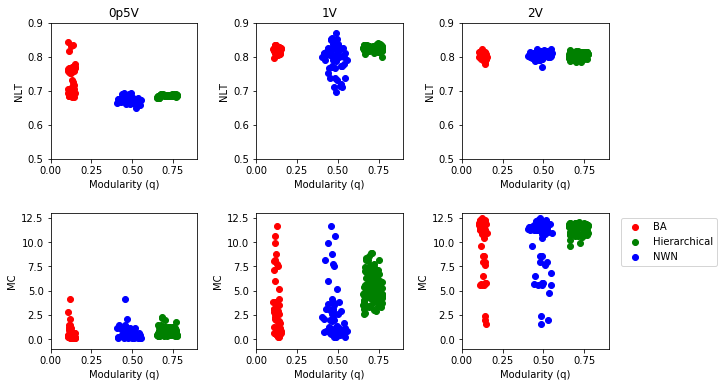

In [21]:
fig,axes=plt.subplots(2,3,figsize=(10,6))
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.4)
i=0
for ax in axes.flat:
    if i < 3:
        ax.set_title(voltageNames[i] + 'V')
        h3=ax.scatter(BAMOD2[i],BANLT2[i],c='r')
        h=ax.scatter(HNWMOD2[i],HNWNLT2[i],c='g')
        h1=ax.scatter(NWNMOD2[i],NWNNLT2[i],c='b')
#         h2=ax.scatter(ElegansMOD[0][0],ElegansNLT2[i],c='orange')

        ax.set_ylim([0.5,0.9])
        ax.set_xlim([0,0.9])
        ax.set_ylabel('NLT')
        ax.set_xlabel('Modularity (q)')
#         plt.legend([h,h1],['HN','NWN'])
    else:
        i2=i-3
#         ax.set_title(voltageNames[i2] + 'V')
        h3=ax.scatter(BAMOD2[i2],BAMC2[i2],c='r')
        h=ax.scatter(HNWMOD2[i2],HNWMC2[i2],c='g')
        h1=ax.scatter(NWNMOD2[i2],NWNMC2[i2],c='b')
#         h2=ax.scatter(ElegansMOD[0][0],ElegansMC2[i2],c='orange')
        ax.set_ylim([-1,13])
        ax.set_xlim([0,0.9])
        ax.set_ylabel('MC')
        ax.set_xlabel('Modularity (q)')
        plt.legend([h3,h,h1],['BA','Hierarchical','NWN'],bbox_to_anchor=(1.05, 1))
    i=i+1
    
plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+name+' Network Comparison 0p5 1 and 2V Sweep - NLT and MC vs Mod',dpi=300)  


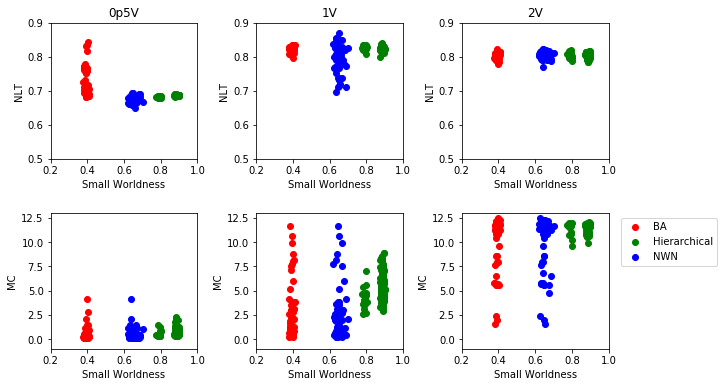

In [23]:
fig,axes=plt.subplots(2,3,figsize=(10,6))
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.4)
i=0
for ax in axes.flat:
    if i < 3:
        ax.set_title(voltageNames[i] + 'V')
        h3=ax.scatter(BASW2[i2],BANLT2[i],c='r')
        h=ax.scatter(HNWSW2[i],HNWNLT2[i],c='g')
        h1=ax.scatter(NWNSW2[i],NWNNLT2[i],c='b')
#         h2=ax.scatter(ElegansSW[0][0],ElegansNLT2[i],c='orange')

        ax.set_ylim([0.5,0.9])
        ax.set_xlim([0.2,1])
        ax.set_ylabel('NLT')
        ax.set_xlabel('Small Worldness')
#         plt.legend([h,h1],['HN','NWN'])
    else:
        i2=i-3
#         ax.set_title(voltageNames[i2] + 'V')
        h3=ax.scatter(BASW2[i2],BAMC2[i2],c='r')
        h=ax.scatter(HNWSW2[i2],HNWMC2[i2],c='g')
        h1=ax.scatter(NWNSW2[i2],NWNMC2[i2],c='b')
#         h2=ax.scatter(ElegansSW[0][0],ElegansMC2[i2],c='orange')
        ax.set_ylim([-1,13])
        ax.set_xlim([0.2,1])
        ax.set_ylabel('MC')
        ax.set_xlabel('Small Worldness')
        plt.legend([h3,h,h1],['BA','Hierarchical','NWN'],bbox_to_anchor=(1.05, 1))
    i=i+1
    
plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+name+' Network Comparison 0p5 1 and 2V Sweep - NLT and MC vs SW',dpi=300)  


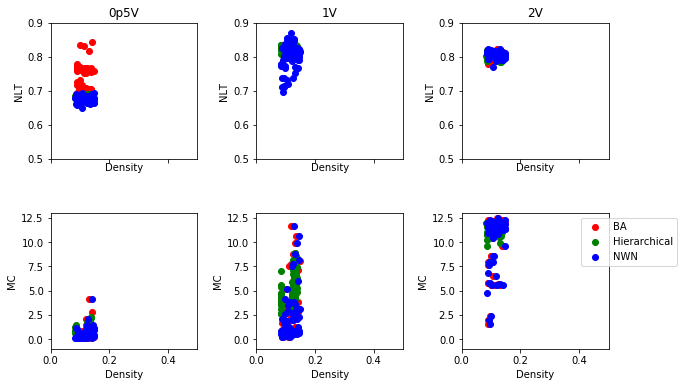

In [24]:
#Density
fig,axes=plt.subplots(2,3,figsize=(10,6),sharex=True)
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.4)
i=0
for ax in axes.flat:
    if i < 3:
        ax.set_title(voltageNames[i] + 'V')
        h3=ax.scatter(BADENSITY2[i],BANLT2[i],c='r')
        h=ax.scatter(HNWDENSITY2[i],HNWNLT2[i],c='g')
        h1=ax.scatter(NWNDENSITY2[i],NWNNLT2[i],c='b')
#         h2=ax.scatter(densityElegans,ElegansNLT2[i],c='orange')
        ax.set_ylim([0.5,0.9])
        ax.set_xlim([0,0.5])
        ax.set_ylabel('NLT')
        ax.set_xlabel('Density')
    else:
        i2=i-3
#         ax.set_title(voltageNames[i2] + 'V')
        h3=ax.scatter(BADENSITY2[i2],BAMC2[i2],c='r')
        h=ax.scatter(HNWDENSITY2[i2],HNWMC2[i2],c='g')
        h1=ax.scatter(NWNDENSITY2[i2],NWNMC2[i2],c='b')
#         h2=ax.scatter(densityElegans,ElegansMC2[i2],c='orange')
        ax.set_ylim([-1,13])
        ax.set_xlim([0,0.5])
        ax.set_ylabel('MC')
        ax.set_xlabel('Density')
        plt.legend([h3,h,h1],['BA','Hierarchical','NWN'],bbox_to_anchor=(1.5, 1))
    i=i+1
    
plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+name+' Network Comparison 0p5 1 and 2V Sweep - NLT and MC vs Density',dpi=300)  


In [25]:
#Find Index of best networks:
idxBESTHNWNLT=np.argsort(HNWNLT2)
idxBESTHNWMC=np.argsort(HNWMC2)
idxBESTNWNNLT=np.argsort(NWNNLT2)
idxBESTNWNMC=np.argsort(NWNMC2)
idxBESTBANLT=np.argsort(BANLT2)
idxBESTBAMC=np.argsort(BAMC2)

BESTHNWNLT=np.sort(HNWNLT2)
BESTHNWMC=np.sort(HNWMC2)
BESTNWNNLT=np.sort(NWNNLT2)
BESTNWNMC=np.sort(NWNMC2)
BESTBANLT=np.sort(BANLT2)
BESTBAMC=np.sort(BAMC2)

#### Node-Level Measures

In [26]:
taskType='NLT'
voltIDX=2

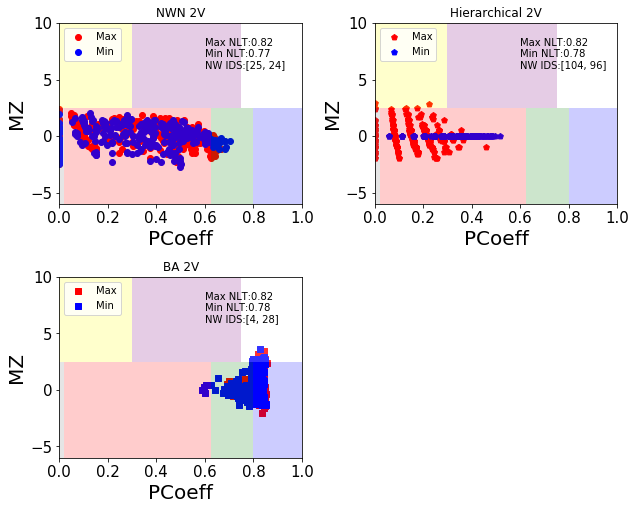

In [27]:
#NLT DRAW ALL NETWORKS ON SAME SPACE


from edamame.analysis.misc import draw_zp_space
fig,axes=plt.subplots(2,2,figsize=(10,8))
# fig.suptitle(str(networkType)+ ' - ' +str(onAmp[chosenVolt])+'V NLT')

fig.subplots_adjust(hspace=.4)
fig.subplots_adjust(wspace=.3)
  
    
# for j in tqdm(range(len(NWNPC2[0]))):
if taskType=='MC':
    if idxBESTNWNMC.size != 0:
        idx1 = idxBESTNWNMC[voltIDX][-1]   
        idx2 = idxBESTNWNMC[voltIDX][0]    
        ax=axes[0][0]
        draw_zp_space(ax = ax)
        ax.set_title('NWN '+voltageNames[voltIDX]+'V')
        h = ax.scatter(NWNPC2[0][idx1],NWNMZ2[0][idx1],c='r')
        ha = ax.scatter(NWNPC2[0][idx2],NWNMZ2[0][idx2],c='b')
        ax.text(0.6,8,'Max MC:'+"{0:.2f}".format(BESTNWNMC[voltIDX][-1]),fontsize=10)
        ax.text(0.6,7,'Min MC:'+"{0:.2f}".format(BESTNWNMC[voltIDX][0]),fontsize=10)
        ax.text(0.6,6,'NW IDS:'+str([idx1,idx2]),fontsize=10)

        ax.legend([h,ha],['Max','Min'])

        #     ax[i].set_title('Max Accuracy ',fontsize=30)
        ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
        ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
        ax.set_ylim(-6, 10)
        ax.set_xlim(0,1)
        ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
        ax.tick_params(axis='both', which='minor', labelsize=15)
    else:
        ax=axes[0][0]
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])

    # for j in tqdm(range(len(HNWPC2[0]))):
    if idxBESTHNWMC.size != 0:
        idx1 = idxBESTHNWMC[voltIDX][-1]    
        idx2 = idxBESTHNWMC[voltIDX][0]    
        ax=axes[0][1]
        draw_zp_space(ax = ax)
        ax.set_title('Hierarchical '+voltageNames[voltIDX]+'V')
        h1 = ax.scatter(HNWPC2[0][idx1],HNWMZ2[0][idx1],c='r',marker='p')
        h1a = ax.scatter(HNWPC2[0][idx2],HNWMZ2[0][idx2],c='b',marker='p')
        ax.text(0.6,8,'Max MC:'+"{0:.2f}".format(BESTHNWMC[voltIDX][-1]),fontsize=10)
        ax.text(0.6,7,'Min MC:'+"{0:.2f}".format(BESTHNWMC[voltIDX][0]),fontsize=10)
        ax.text(0.6,6,'NW IDS:'+str([idx1,idx2]),fontsize=10)
        ax.legend([h1,h1a],['Max','Min'])

        #     ax[i].set_title('Max Accuracy ',fontsize=30)
        ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
        ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
        ax.set_ylim(-6, 10)
        ax.set_xlim(0,1)

        ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
        ax.tick_params(axis='both', which='minor', labelsize=15)
    else:
        ax=axes[0][1]
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])

    # for j in tqdm(range(len(BAPC2[0]))):
    if idxBESTBAMC.size != 0:
        idx1 = idxBESTBAMC[voltIDX][-1]    
        idx2 = idxBESTBAMC[voltIDX][0]    
        ax=axes[1][0]
        draw_zp_space(ax = ax)
        ax.set_title('BA '+voltageNames[voltIDX]+'V')
        h3 = ax.scatter(BAPC2[0][idx1],BAMZ2[0][idx1],c='r',marker='s')
        h3a = ax.scatter(BAPC2[0][idx2],BAMZ2[0][idx2],c='b',marker='s')
        ax.text(0.6,8,'Max MC:'+"{0:.2f}".format(BESTBAMC[voltIDX][-1]),fontsize=10)
        ax.text(0.6,7,'Min MC:'+"{0:.2f}".format(BESTBAMC[voltIDX][0]),fontsize=10)
        ax.text(0.6,6,'NW IDS:'+str([idx1,idx2]),fontsize=10)
        ax.legend([h3,h3a],['Max','Min'])

        #     ax[i].set_title('Max Accuracy ',fontsize=30)
        ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
        ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
        ax.set_ylim(-6, 10)
        ax.set_xlim(0,1)

        ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
        ax.tick_params(axis='both', which='minor', labelsize=15)
    else:
        ax=axes[1][0]
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
        
    # for j in tqdm(range(len(ElegansPC2[0]))):
    idx = 0
    ax=axes[1][1]
    draw_zp_space(ax = ax)
    ax.set_title('Elegans '+voltageNames[voltIDX]+'V')
    h2 = ax.scatter(ElegansPC2[0][idx],ElegansMZ2[0][idx],c='orange',marker='X')
    ax.text(0.6,6,'MC:'+"{0:.2f}".format(ElegansMC2[voltIDX]),fontsize=10)

    #     ax[i].set_title('Max Accuracy ',fontsize=30)
    ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
    ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
    ax.set_ylim(-6, 10)
    ax.set_xlim(0,1)

    ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
    ax.tick_params(axis='both', which='minor', labelsize=15)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+name+' Top vs Bottom Network MC Comparison '+voltageNames[voltIDX]+'V Sweep - Guimera Amaral',dpi=300)
else:
    if idxBESTNWNNLT.size != 0:
        idx1 = idxBESTNWNNLT[voltIDX][-1]   
        idx2 = idxBESTNWNNLT[voltIDX][0]    
        ax=axes[0][0]
        draw_zp_space(ax = ax)
        ax.set_title('NWN '+voltageNames[voltIDX]+'V')
        h = ax.scatter(NWNPC2[0][idx1],NWNMZ2[0][idx1],c='r')
        ha = ax.scatter(NWNPC2[0][idx2],NWNMZ2[0][idx2],c='b')
        ax.text(0.6,8,'Max NLT:'+"{0:.2f}".format(BESTNWNNLT[voltIDX][-1]),fontsize=10)
        ax.text(0.6,7,'Min NLT:'+"{0:.2f}".format(BESTNWNNLT[voltIDX][0]),fontsize=10)
        ax.text(0.6,6,'NW IDS:'+str([idx1,idx2]),fontsize=10)

        ax.legend([h,ha],['Max','Min'])

        #     ax[i].set_title('Max Accuracy ',fontsize=30)
        ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
        ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
        ax.set_ylim(-6, 10)
        ax.set_xlim(0,1)
        ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
        ax.tick_params(axis='both', which='minor', labelsize=15)
    else:
        ax=axes[0][0]
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
    # for j in tqdm(range(len(HNWPC2[0]))):
    if idxBESTHNWNLT.size != 0:
        idx1 = idxBESTHNWNLT[voltIDX][-1]    
        idx2 = idxBESTHNWNLT[voltIDX][0]    
        ax=axes[0][1]
        draw_zp_space(ax = ax)
        ax.set_title('Hierarchical '+voltageNames[voltIDX]+'V')
        h1 = ax.scatter(HNWPC2[0][idx1],HNWMZ2[0][idx1],c='r',marker='p')
        h1a = ax.scatter(HNWPC2[0][idx2],HNWMZ2[0][idx2],c='b',marker='p')
        ax.text(0.6,8,'Max NLT:'+"{0:.2f}".format(BESTHNWNLT[voltIDX][-1]),fontsize=10)
        ax.text(0.6,7,'Min NLT:'+"{0:.2f}".format(BESTHNWNLT[voltIDX][0]),fontsize=10)
        ax.text(0.6,6,'NW IDS:'+str([idx1,idx2]),fontsize=10)
        ax.legend([h1,h1a],['Max','Min'])

        #     ax[i].set_title('Max Accuracy ',fontsize=30)
        ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
        ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
        ax.set_ylim(-6, 10)
        ax.set_xlim(0,1)

        ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
        ax.tick_params(axis='both', which='minor', labelsize=15)

    else:
        ax=axes[0][1]
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
        
    # for j in tqdm(range(len(BAPC2[0]))):
    if idxBESTBANLT.size != 0:
        idx1 = idxBESTBANLT[voltIDX][-1]    
        idx2 = idxBESTBANLT[voltIDX][0]    
        ax=axes[1][0]
        draw_zp_space(ax = ax)
        ax.set_title('BA '+voltageNames[voltIDX]+'V')
        h3 = ax.scatter(BAPC2[0][idx1],BAMZ2[0][idx1],c='r',marker='s')
        h3a = ax.scatter(BAPC2[0][idx2],BAMZ2[0][idx2],c='b',marker='s')
        ax.text(0.6,8,'Max NLT:'+"{0:.2f}".format(BESTBANLT[voltIDX][-1]),fontsize=10)
        ax.text(0.6,7,'Min NLT:'+"{0:.2f}".format(BESTBANLT[voltIDX][0]),fontsize=10)
        ax.text(0.6,6,'NW IDS:'+str([idx1,idx2]),fontsize=10)
        ax.legend([h3,h3a],['Max','Min'])

        #     ax[i].set_title('Max Accuracy ',fontsize=30)
        ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
        ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
        ax.set_ylim(-6, 10)
        ax.set_xlim(0,1)

        ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
        ax.tick_params(axis='both', which='minor', labelsize=15)
        
    else:
        ax=axes[1][0]
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
    # for j in tqdm(range(len(ElegansPC2[0]))):
    
    #ELEGANS:
    ax=axes[1][1]
    ax.set_frame_on(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])
#     idx = 0
#     ax=axes[1][1]
#     draw_zp_space(ax = ax)
#     ax.set_title('Elegans '+voltageNames[voltIDX]+'V')
#     h2 = ax.scatter(ElegansPC2[0][idx],ElegansMZ2[0][idx],c='orange',marker='X')
#     ax.text(0.6,6,'NLT:'+"{0:.2f}".format(ElegansNLT2[voltIDX]),fontsize=10)

#     #     ax[i].set_title('Max Accuracy ',fontsize=30)
#     ax.set_xlabel('PCoeff',fontsize=20)#,labelpad=5)
#     ax.set_ylabel('MZ',fontsize=20)#,labelpad=5)
#     ax.set_ylim(-6, 10)
#     ax.set_xlim(0,1)

#     ax.tick_params(axis='both', which='major', labelsize=15) #change size of label ticks
#     ax.tick_params(axis='both', which='minor', labelsize=15)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+name+' Top vs Bottom Network NLT Comparison '+voltageNames[voltIDX]+'V Sweep - Guimera Amaral',dpi=300)

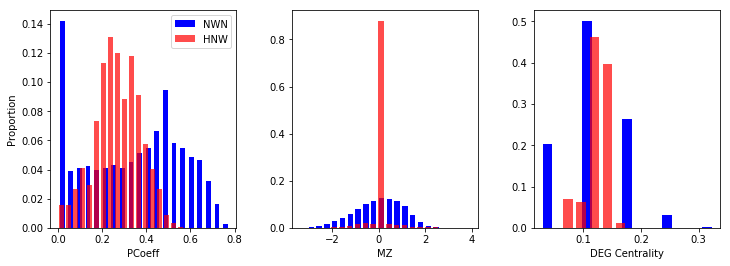

In [28]:
## PCOEFF HISTOGRAMS
fig=plt.figure(figsize=(12,4))
ax=[None]*3
fig.subplots_adjust(wspace=.3)
# fig.subplots_adjust(hspace=.3)

ax[0]=fig.add_subplot(131)
tempNWN=np.hstack(NWNPC2[0])
tempHNW=np.hstack(HNWPC2[0])
hist, bins=np.histogram(tempHNW,20)
histMin, binsMin=np.histogram(tempNWN,20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
widthMin=0.7 * (binsMin[1] - binsMin[0])
centerMin=(binsMin[:-1] + binsMin[1:]) / 2
plt.bar(centerMin, histMin/len(tempNWN), align='center', width=width,label='NWN',color='b')
plt.bar(center, hist/len(tempHNW), align='center', width=width,label='HNW',color='r',alpha=0.7)
# plt.xlim([0.01,0.8])
# plt.ylim([0,0.5])

# plt.xlim([0.01,0.8])
# plt.ylim([0,700])
plt.xlabel('PCoeff')
plt.ylabel('Proportion')
plt.legend()

# NONLINEAR TRANSFORMATION
# MZ
ax[1]=fig.add_subplot(132)
tempMZNWN=np.hstack(NWNMZ2[0])
tempMZHNW=np.hstack(HNWMZ2[0])
hist, bins=np.histogram(tempMZHNW,20)
histMin, binsMin=np.histogram(tempMZNWN,20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
widthMin=0.7 * (binsMin[1] - binsMin[0])
centerMin=(binsMin[:-1] + binsMin[1:]) / 2
plt.bar(centerMin, histMin/len(tempMZNWN), align='center', width=width,label='NWN',color='b')
plt.bar(center, hist/len(tempMZHNW), align='center', width=width,label='HNW',color='r',alpha=0.7)
plt.xlabel('MZ')
# plt.ylim([0,0.08])
# plt.xlim([-4,4])

# #Deg Centrality
ax[1]=fig.add_subplot(133)
tempDEGNWN=np.hstack(NWNDEGCENT2[0])
tempDEGHNW=np.hstack(HNWDEGCENT2[0])
hist, bins=np.histogram(tempDEGHNW,5)
histMin, binsMin=np.histogram(tempDEGNWN,5)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
widthMin=0.7 * (binsMin[1] - binsMin[0])
centerMin=(binsMin[:-1] + binsMin[1:]) / 2
plt.bar(centerMin, histMin/len(tempDEGNWN), align='center', width=width,label='NWN',color='b')
plt.bar(center, hist/len(tempDEGHNW), align='center', width=width,label='HNW',color='r',alpha=0.7)
plt.xlabel('DEG Centrality')
# plt.ylim([0,0.08])
# plt.xlim([0,0.3])
plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+name+' NWN vs HWN Networks 0p5 1 and 2V Sweep - PCoeff MZ DegCentrality Histograms',dpi=300)  


In [29]:
networkType='NWN'
taskType='NLT'

In [30]:
#Plot Degree Centrality Networks:
bottomTop='Bottom'
for j in range(3):
    fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(20,6))
    if networkType=='NWN':
        if taskType=='NLT':
            top10=np.argsort(NWNNLT2[j])[-10:]
            bottom10=np.argsort(NWNNLT2[j])[:10]
            NLT=NWNNLT2
        else:
            top10=np.argsort(NWNMC2[j])[-10:]
            bottom10=np.argsort(NWNMC2[j])[:10]
            MC=NWNMC2
            
        GRAPH=NWNGRAPH2
        DEGCENT=NWNDEGCENT2
    else:
        if taskType=='NLT':
            top10=np.argsort(HNWNLT2[j])[-10:]
            bottom10=np.argsort(HNWNLT2[j])[:10]
            NLT=HNWNLT2
        else:
            top10=np.argsort(HNWMC2[j])[-10:]
            bottom10=np.argsort(HNWMC2[j])[:10]
            MC=HNWMC2
        GRAPH=HNWGRAPH2
        DEGCENT=HNWDEGCENT2
       
    
# fig.suptitle(str(networkType)+' Deg Centrality NLT - ' +str(onAmp[chosenVolt]))
# fig.subplots_adjust(hspace=)
# fig.subplots_adjust(wspace=.2)
    if bottomTop=='Top':
        i=0
        for ax in axes.flat:
            ax.set_ylim([-1.2,1.2])
            ax.set_xlim([-1.2,1.2])
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)
            pos=nx.kamada_kawai_layout(GRAPH[j][top10[i]])
            h=nx.draw_networkx_nodes(GRAPH[j][top10[i]],pos,cmap=plt.cm.jet,node_color=DEGCENT[j][top10[i]],node_size=20,ax=ax,vmin=0,vmax=0.15)#np.max([np.max(np.hstack(DEG)),np.max(np.hstack(DEG_MC))]))
            nx.draw_networkx_edges(GRAPH[j][top10[i]],pos,alpha=0.1,ax=ax)
            if taskType=='NLT':
                ax.text(0.75,0.9,'NLT:'+"{0:.2f}".format(NLT[j][top10[i]]),fontsize=10)
            else:
                ax.text(0.75,0.9,'MC:'+"{0:.2f}".format(MC[j][top10[i]]),fontsize=10)
            i=i+1
        fig.colorbar(h,ax=axes.ravel().tolist(),label='DEG CENTRALITY')


        plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+networkType+' Top 10 Mod0p75 Networks DEG Centrality - '+voltageNames[j]+' VSweep '+ taskType,dpi=300)  
    else:
        i=0
        for ax in axes.flat:
            ax.set_ylim([-1.2,1.2])
            ax.set_xlim([-1.2,1.2])
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)
            pos=nx.kamada_kawai_layout(GRAPH[j][bottom10[i]])
            h=nx.draw_networkx_nodes(GRAPH[j][bottom10[i]],pos,cmap=plt.cm.jet,node_color=DEGCENT[j][bottom10[i]],node_size=20,ax=ax,vmin=0,vmax=0.15)#np.max([np.max(np.hstack(DEG)),np.max(np.hstack(DEG_MC))]))
            nx.draw_networkx_edges(GRAPH[j][bottom10[i]],pos,alpha=0.1,ax=ax)
            if taskType=='NLT':
                ax.text(0.75,0.9,'NLT:'+"{0:.2f}".format(NLT[j][bottom10[i]]),fontsize=10)
            else:
                ax.text(0.75,0.9,'MC:'+"{0:.2f}".format(MC[j][bottom10[i]]),fontsize=10)            
            i=i+1
        fig.colorbar(h,ax=axes.ravel().tolist(),label='DEG CENTRALITY')

        plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'+networkType+' Bottom 10 Mod0p75 Networks DEG Centrality - '+voltageNames[j]+' VSweep ' + taskType,dpi=300)  


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb8bedf6620> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fb8bed330d0> (for post_execute):


KeyboardInterrupt: 

#### Compare Densities:

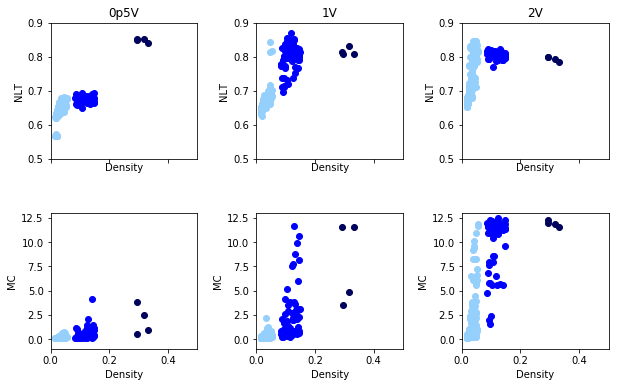

In [48]:
#Density
fig,axes=plt.subplots(2,3,figsize=(10,6),sharex=True)
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.4)
for density in range(len(dfDensity)): #for each density:
    if density==0:
        j='HighDensity'
        c='#033500'
        c1='#00035b'
        c3='#840000'
    elif density == 1:
        j='LowDensity'
        c='#96f97b'
        c1='#95d0fc'
        c3='#ff474c'
    else:
        j='PeakDensity'
        c='g'
        c1='b'
        c3='r'
    i=0
    for ax in axes.flat:
        if i < 3:
            ax.set_title(voltageNames[i] + 'V')
#             if len(dfDensity[j].BA['MOD'][i]) !=0:
#                 h3=ax.scatter(dfDensity[j].BA['MOD'][i],dfDensity[j].BA['NLT'][i],c=c3)
#             if len(dfDensity[j].HNW['Density'][i]) !=0:
#                 h=ax.scatter(dfDensity[j].HNW['Density'][i],dfDensity[j].HNW['NLT'][i],c=c)
            if len(dfDensity[j].NWN['Density'][i]) !=0:
                h1=ax.scatter(dfDensity[j].NWN['Density'][i],dfDensity[j].NWN['NLT'][i],c=c1)
    #         h2=ax.scatter(densityElegans,ElegansNLT2[i],c='orange')
            ax.set_ylim([0.5,0.9])
            ax.set_xlim([0,0.5])
            ax.set_ylabel('NLT')
            ax.set_xlabel('Density')
        else:
            i2=i-3
    #         ax.set_title(voltageNames[i2] + 'V')
#             if len(dfDensity[j].BA['MOD'][i2]) !=0:
#                 h3=ax.scatter(dfDensity[j].BA['MOD'][i2],dfDensity[j].BA['MC'][i2],c=c3)
#             if len(dfDensity[j].HNW['Density'][i2]) !=0:
#                 h=ax.scatter(dfDensity[j].HNW['Density'][i2],dfDensity[j].HNW['MC'][i2],c=c)
            if len(dfDensity[j].NWN['Density'][i2]) !=0:
                h1=ax.scatter(dfDensity[j].NWN['Density'][i2],dfDensity[j].NWN['MC'][i2],c=c1)
    #         h2=ax.scatter(densityElegans,ElegansMC2[i2],c='orange')
            ax.set_ylim([-1,13])
            ax.set_xlim([0,0.5])
            ax.set_ylabel('MC')
            ax.set_xlabel('Density')
#             if len(dfDensity[j].BA['Density'][i2]) ==0:
#                 plt.legend([h,h1],['Hierarchical','NWN'],bbox_to_anchor=(1.5, 1))
#             elif len(dfDensity[j].NWN['Density'][i2]) ==0:
#                 plt.legend([h3,h],['BA','Hierarchical'],bbox_to_anchor=(1.5, 1))
#             elif len(dfDensity[j].HNW['Density'][i2]) ==0:
#                 plt.legend([h3,h1],['BA','NWN'],bbox_to_anchor=(1.5, 1))
#             else:
#                 plt.legend([h3,h,h1],['BA','Hierarchical','NWN'],bbox_to_anchor=(1.5, 1))

        i=i+1

plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/NWN Density Comparison - Low Peak High - 0p5 1 and 2V Sweep - NLT and MC vs Density',dpi=300)  


In [85]:
#Compare networks with same density but different accuracy:
WorstLowDenseNWNIDX=np.argmin(dfDensity['LowDensity'].NWN['NLT'][1])
BestPeakDenseNWNIDX=np.argmax(dfDensity['PeakDensity'].NWN['NLT'][1])
WorsePeakDenseNWNIDX=np.argmin(dfDensity['PeakDensity'].NWN['NLT'][1])
HighDenseNWNIDX=np.argmax(dfDensity['HighDensity'].NWN['Density'][1])


WorstLowDenseNWN=dfDensity['LowDensity'].NWN['GRAPHS'][1][WorstLowDenseNWNIDX]
BestPeakDenseNWN=dfDensity['PeakDensity'].NWN['GRAPHS'][1][BestPeakDenseNWNIDX]
WorsePeakDenseNWN=dfDensity['PeakDensity'].NWN['GRAPHS'][1][WorsePeakDenseNWNIDX]
HighDenseNWN=dfDensity['HighDensity'].NWN['GRAPHS'][1][HighDenseNWNIDX]


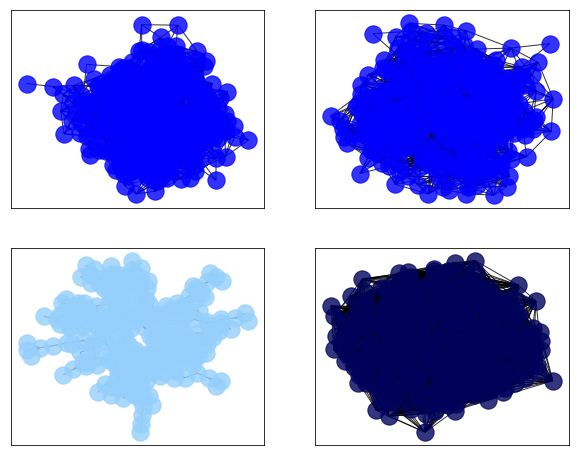

In [100]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
pos1=nx.kamada_kawai_layout(WorsePeakDenseNWN)
pos2=nx.kamada_kawai_layout(BestPeakDenseNWN)
pos3=nx.kamada_kawai_layout(WorstLowDenseNWN)
pos4=nx.kamada_kawai_layout(HighDenseNWN)

nx.draw_networkx(WorsePeakDenseNWN,pos=pos1,node_color='b',ax=axes[0][0],with_labels=False,alpha=0.8)
nx.draw_networkx(BestPeakDenseNWN,pos=pos2,node_color='b',ax=axes[0][1],with_labels=False,alpha=0.8)
nx.draw_networkx(WorstLowDenseNWN,pos=pos3,node_color='#95d0fc',ax=axes[1][0],with_labels=False,alpha=0.8)
nx.draw_networkx(HighDenseNWN,pos=pos4,node_color='#00035b',ax=axes[1][1],with_labels=False,alpha=0.8)


---

### Laplacian Spectrum Comparison(https://www.frontiersin.org/articles/10.3389/fncom.2013.00189/full?s=09)

Ask Joel how to normalize eigenvalue frequency = 1

In [ ]:
taskType='NLT' #choose task type for saving and loading

In [ ]:
#Sort Networks & save top and bottom 15
idxMaxNWNMC=[];idxMaxNWNNLT=[];idxMinNWNNLT=[];idxMinNWNMC=[];MaxNWNNLT=[];MaxNWNMC=[];MinNWNNLT=[];MinNWNMC=[]
idxMaxHNWMC=[];idxMaxHNWNLT=[];idxMinHNWNLT=[];idxMinHNWMC=[];MaxHNWNLT=[];MaxHNWMC=[];MinHNWNLT=[];MinHNWMC=[]

idxMaxBAMC=[];idxMaxBANLT=[];idxMinBANLT=[];idxMinBAMC=[];MaxBANLT=[];MaxBAMC=[];MinBANLT=[];MinBAMC=[]
for i in range(len(NWNMC)):
    idxMaxNWNMC.append(np.argsort(NWNMC[i])[-15:])
    idxMaxNWNNLT.append(np.argsort(NWNNLT[i])[-15:])
    idxMinNWNMC.append(np.argsort(NWNMC[i])[:15])
    idxMinNWNNLT.append(np.argsort(NWNNLT[i])[:15])
    MaxNWNNLT.append(np.sort(NWNNLT[i])[-15:])
    MinNWNNLT.append(np.sort(NWNNLT[i])[:15])
    MaxNWNMC.append(np.sort(NWNMC[i])[-15:])
    MinNWNMC.append(np.sort(NWNMC[i])[:15])
    
    idxMaxHNWMC.append(np.argsort(HNWMC[i])[-15:])
    idxMaxHNWNLT.append(np.argsort(HNWNLT[i])[-15:])
    idxMinHNWMC.append(np.argsort(HNWMC[i])[:15])
    idxMinHNWNLT.append(np.argsort(HNWNLT[i])[:15])
    MaxHNWNLT.append(np.sort(HNWNLT[i])[-15:])
    MinHNWNLT.append(np.sort(HNWNLT[i])[:15])
    MaxHNWMC.append(np.sort(HNWMC[i])[-15:])
    MinHNWMC.append(np.sort(HNWMC[i])[:15])

    idxMaxBAMC.append(np.argsort(BAMC[i])[-15:])
    idxMaxBANLT.append(np.argsort(BANLT[i])[-15:])
    idxMinBAMC.append(np.argsort(BAMC[i])[:15])
    idxMinBANLT.append(np.argsort(BANLT[i])[:15])
    MaxBANLT.append(np.sort(BANLT[i])[-15:])
    MinBANLT.append(np.sort(BANLT[i])[:15])
    MaxBAMC.append(np.sort(BAMC[i])[-15:])
    MinBAMC.append(np.sort(BAMC[i])[:15])

#     idxBAMC.append(np.argsort(BAMC[i])[-15:])
#     idxHNWMC.append(np.argsort(HNWMC[i])[-15:])

In [ ]:
#Plot Spectral Plots for Each Network
#Crossbar
plt.figure()
plt.title('Crossbar')
LspectrumC = nx.linalg.spectrum.normalized_laplacian_spectrum(dfCrossbar['G'][0])
sigma = 0.015
dx = 0.001
sig2 = 2*np.pi*sigma**2
x = np.arange(0, 2, dx)
gammaC = np.array([np.sum(np.exp(-(abs(x[i]-LspectrumC)**2)/(sig2/np.pi)))/np.sqrt(sig2) for i in range(len(x))])
gammaC=gammaC/np.sum(gammaC)/dx
plt.plot(x, gammaC)

In [ ]:
#Define Spectral plots for all networks
b=[]
LspecBA=np.empty((300,300))
LspecBA[:]=np.nan
for i in tqdm(range(len(dfBA['Graphs'][0]))):
    b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfBA['Graphs'][0][i])
    LspecBA[i][:len(b)]=b
    
#And for Max 15, Min 15 for NLT and MC Tasks:
LspecMaxBANLT=[np.empty((15,300)) for i in range(len(idxMaxBANLT))]
for i in tqdm(range(len(idxMaxBANLT))): #for each voltage
    LspecMaxBANLT[i][:]=np.nan
    count=0
    for j in range(len(dfBA['Graphs'][i])):
        for k in range(len(idxMaxBANLT[i])):
            if j==idxMaxBANLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfBA['Graphs'][i][j])
                LspecMaxBANLT[i][count][:len(b)]=b
                count = count+1
                
LspecMinBANLT=[np.empty((15,300)) for i in range(len(idxMinBANLT))]
for i in tqdm(range(len(idxMinBANLT))): #for each voltage
    LspecMinBANLT[i][:]=np.nan
    count=0
    for j in range(len(dfBA['Graphs'][i])):
        for k in range(len(idxMinBANLT[i])):
            if j==idxMinBANLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfBA['Graphs'][i][j])
                LspecMinBANLT[i][count][:len(b)]=b
                count = count+1    
    
LspecMaxBAMC=[np.empty((15,300)) for i in range(len(idxMaxBAMC))]
for i in tqdm(range(len(idxMaxBAMC))): #for each voltage
    LspecMaxBAMC[i][:]=np.nan
    count=0
    for j in range(len(dfBA['Graphs'][i])):
        for k in range(len(idxMaxBAMC[i])):
            if j==idxMaxBAMC[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfBA['Graphs'][i][j])
                LspecMaxBAMC[i][count][:len(b)]=b
                count = count+1
                
LspecMinBAMC=[np.empty((15,300)) for i in range(len(idxMinBAMC))]
for i in tqdm(range(len(idxMinBAMC))): #for each voltage
    LspecMinBAMC[i][:]=np.nan
    count=0
    for j in range(len(dfBA['Graphs'][i])):
        for k in range(len(idxMinBAMC[i])):
            if j==idxMinBAMC[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfBA['Graphs'][i][j])
                LspecMinBAMC[i][count][:len(b)]=b
                count = count+1

In [ ]:
#Repeat above for each network type
plt.figure()
plt.title('BA')
sigma = 0.015
dx = 0.001
sig2 = 2*np.pi*sigma**2
x = np.arange(0, 2, dx)
temp=[]
for j in tqdm(range(len(LspecBA))):
    a=np.array([np.sum(np.exp(-(abs(x[i]-LspecBA[j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for i in range(len(x))])
    temp.append(a/np.sum(a)/dx)
    
gammaB=np.nanmean(temp,axis=0)
gammaBSTD=np.nanstd(temp,axis=0)
plt.plot(x, gammaB)
plt.fill_between(x,gammaB-gammaBSTD,gammaB+gammaBSTD,alpha=0.3)
plt.ylim([0,10])

In [ ]:
gammaMaxB=[];gammaMaxBSTD=[];gammaMinB=[];gammaMinBSTD=[]


if taskType=='NLT':
    print(taskType)
    temp=[]

    fig,axes=plt.subplots(3,4,figsize=(10,8))#,sharex=True,sharey=True)
    fig.text(0.04, 0.5, 'Relative Frequency', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Eigenvalue', ha='center', rotation='horizontal')
    fig.subplots_adjust(wspace=.3)
    fig.subplots_adjust(hspace=.3)

    
    i=0
    for ax in tqdm(axes.flat):
        if i < 11:
            temp=[]
            tempMin=[]
            b=[]
            a=[]
            for j in range(len(LspecMaxBANLT[i])): #for each network
                a=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxBANLT[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                b=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxBANLT[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                a=a/np.sum(a)/dx
                temp.append(a)
                b=b/np.sum(b)/dx
                tempMin.append(b)
            gammaMaxB.append(np.nanmean(temp,axis=0)) #avg gamma across networks
            gammaMinB.append(np.nanmean(tempMin,axis=0))

            gammaMaxBSTD.append(np.nanstd(temp,axis=0)) #std gamma across networks
            gammaMinBSTD.append(np.nanstd(tempMin,axis=0))
            h=ax.plot(x, gammaMaxB[i],'r',label='Max')
            ax.fill_between(x,gammaMaxB[i]-gammaMaxBSTD[i],gammaMaxB[i]+gammaMaxBSTD[i],alpha=0.3,facecolor='r')
            h1=ax.plot(x,gammaMinB[i],'b',label='Min')
            ax.fill_between(x,gammaMinB[i]-gammaMinBSTD[i],gammaMinB[i]+gammaMinBSTD[i],alpha=0.3,facecolor='b')
            ax.set_ylim([0,10])
            ax.set_title(str(onAmp[i]) + 'V')
            ax.text(0.7,9,'Max NLT:'+"{0:.2f}".format(MaxBANLT[i][-1]),fontsize=10)
            ax.text(0.7,8,'Min NLT:'+"{0:.2f}".format(MinBANLT[i][0]),fontsize=10)
            i=i+1
        else:
            plt.legend([h[0],h1[0]],['Max','Min'],loc='upper left')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - BA NLT Max15 vs Min15 VSweep',dpi=300)  
else:
    print(taskType)
    fig,axes=plt.subplots(3,4,figsize=(10,8))#,sharex=True,sharey=True)
    fig.text(0.04, 0.5, 'Relative Frequency', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Eigenvalue', ha='center', rotation='horizontal')

    fig.subplots_adjust(wspace=.3)
    fig.subplots_adjust(hspace=.3)


    i=0
    for ax in tqdm(axes.flat):
        if i < 11:
            temp=[]
            tempMin=[]
            b=[]
            a=[]
            for j in range(len(LspecMaxBAMC[i])): #for each network
                a=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxBAMC[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                b=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxBAMC[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                a=a/np.sum(a)/dx
                temp.append(a)
                b=b/np.sum(b)/dx
                tempMin.append(b)
            gammaMaxB.append(np.nanmean(temp,axis=0)) #avg gamma across networks
            gammaMinB.append(np.nanmean(tempMin,axis=0))

            gammaMaxBSTD.append(np.nanstd(temp,axis=0)) #std gamma across networks
            gammaMinBSTD.append(np.nanstd(tempMin,axis=0))
            h=ax.plot(x, gammaMaxB[i],'r',label='Max')
            ax.fill_between(x,gammaMaxB[i]-gammaMaxBSTD[i],gammaMaxB[i]+gammaMaxBSTD[i],alpha=0.3,facecolor='r')
            h1=ax.plot(x,gammaMinB[i],'b',label='Min')
            ax.fill_between(x,gammaMinB[i]-gammaMinBSTD[i],gammaMinB[i]+gammaMinBSTD[i],alpha=0.3,facecolor='b')
            ax.set_ylim([0,10])
            ax.set_title(str(onAmp[i]) + 'V')
            ax.text(0.7,9,'Max MC:'+"{0:.2f}".format(MaxBAMC[i][-1]),fontsize=10)
            ax.text(0.7,8,'Min MC:'+"{0:.2f}".format(MinBAMC[i][0]),fontsize=10)
            i=i+1
        else:
            plt.legend([h[0],h1[0]],['Max','Min'],loc='upper left')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - BA MC Max15 vs Min15 VSweep',dpi=300)  

In [ ]:
plt.figure()
plt.title('C. Elegans')
LspectrumE = nx.linalg.spectrum.normalized_laplacian_spectrum(dfElegans['G'][0])
sigma = 0.015
dx = 0.001
sig2 = 2*np.pi*sigma**2
x = np.arange(0, 2, dx)
gammaE = np.array([np.sum(np.exp(-(abs(x[i]-LspectrumE)**2)/(sig2/np.pi)))/np.sqrt(sig2) for i in range(len(x))])
gammaE=gammaE/np.sum(gammaE)/dx
# area=-np.trapz(x,gammaE)
# gammaE=gammaE/area
plt.plot(x, gammaE)

plt.ylim([0,5])

In [ ]:
b=[]
LspecNWN=np.empty((300,300))
LspecNWN[:]=np.nan
for j in range(len(dfNWN['Graphs'][0])):
    b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfNWN['Graphs'][0][j])
    LspecNWN[j][:len(b)]=b

LspecMaxNWNNLT=[np.empty((15,300)) for i in range(len(idxMaxNWNNLT))]
for i in tqdm(range(len(idxMaxNWNNLT))): #for each voltage
    LspecMaxNWNNLT[i][:]=np.nan
    count=0
    for j in range(len(dfNWN['Graphs'][i])):
        for k in range(len(idxMaxNWNNLT[i])):
            if j==idxMaxNWNNLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfNWN['Graphs'][i][j])
                LspecMaxNWNNLT[i][count][:len(b)]=b
                count = count+1
                
LspecMinNWNNLT=[np.empty((15,300)) for i in range(len(idxMinNWNNLT))]
for i in tqdm(range(len(idxMinNWNNLT))): #for each voltage
    LspecMinNWNNLT[i][:]=np.nan
    count=0
    for j in range(len(dfNWN['Graphs'][i])):
        for k in range(len(idxMinNWNNLT[i])):
            if j==idxMinNWNNLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfNWN['Graphs'][i][j])
                LspecMinNWNNLT[i][count][:len(b)]=b
                count = count+1    
    
LspecMaxNWNMC=[np.empty((15,300)) for i in range(len(idxMaxNWNMC))]
for i in tqdm(range(len(idxMaxNWNMC))): #for each voltage
    LspecMaxNWNMC[i][:]=np.nan
    count=0
    for j in range(len(dfNWN['Graphs'][i])):
        for k in range(len(idxMaxNWNMC[i])):
            if j==idxMaxNWNMC[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfNWN['Graphs'][i][j])
                LspecMaxNWNMC[i][count][:len(b)]=b
                count = count+1
                
LspecMinNWNMC=[np.empty((15,300)) for i in range(len(idxMinNWNMC))]
for i in tqdm(range(len(idxMinNWNMC))): #for each voltage
    LspecMinNWNMC[i][:]=np.nan
    count=0
    for j in range(len(dfNWN['Graphs'][i])):
        for k in range(len(idxMinNWNMC[i])):
            if j==idxMinNWNNLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfNWN['Graphs'][i][j])
                LspecMinNWNMC[i][count][:len(b)]=b
                count = count+1

In [ ]:
gammaN=[];gammaNSTD=[]
sigma = 0.015
dx = 0.001
sig2 = 2*np.pi*sigma**2
x = np.arange(0, 2, dx)
temp=[]
a=[]
for j in tqdm(range(len(LspecNWN))): #for each network
    a=np.array([np.nansum(np.exp(-(abs(x[k]-LspecNWN[j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
    a=a/np.sum(a)/dx
    temp.append(a)
gammaN=np.nanmean(temp,axis=0) #avg gamma across networks
gammaNSTD=np.nanstd(temp,axis=0)

In [ ]:
gammaMaxN=[];gammaMaxNSTD=[];gammaMinN=[];gammaMinNSTD=[]

if taskType=='NLT':
    print(taskType)
    temp=[]

    fig,axes=plt.subplots(3,4,figsize=(10,8))#,sharex=True,sharey=True)
    fig.text(0.04, 0.5, 'Relative Frequency', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Eigenvalue', ha='center', rotation='horizontal')
    fig.subplots_adjust(wspace=.3)
    fig.subplots_adjust(hspace=.3)

    
    i=0
    for ax in tqdm(axes.flat):
        if i < 11:
            temp=[]
            tempMin=[]
            b=[]
            a=[]
            for j in range(len(LspecMaxNWNNLT[i])): #for each network
                a=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxNWNNLT[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                b=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMinNWNNLT[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                a=a/np.sum(a)/dx
                temp.append(a)
                b=b/np.sum(b)/dx
                tempMin.append(b)
            gammaMaxN.append(np.nanmean(temp,axis=0)) #avg gamma across networks
            gammaMinN.append(np.nanmean(tempMin,axis=0))

            gammaMaxNSTD.append(np.nanstd(temp,axis=0)) #std gamma across networks
            gammaMinNSTD.append(np.nanstd(tempMin,axis=0))
            h=ax.plot(x, gammaMaxN[i],'r',label='Max')
            ax.fill_between(x,gammaMaxN[i]-gammaMaxNSTD[i],gammaMaxN[i]+gammaMaxNSTD[i],alpha=0.3,facecolor='r')
            h1=ax.plot(x,gammaMinN[i],'b',label='Min')
            ax.fill_between(x,gammaMinN[i]-gammaMinNSTD[i],gammaMinN[i]+gammaMinNSTD[i],alpha=0.3,facecolor='b')
            ax.set_ylim([0,10])
            ax.set_title(str(onAmp[i]) + 'V')
            ax.text(0.7,9,'Max NLT:'+"{0:.2f}".format(MaxNWNNLT[i][-1]),fontsize=10)
            ax.text(0.7,8,'Min NLT:'+"{0:.2f}".format(MinNWNNLT[i][0]),fontsize=10)
            i=i+1
        else:
            plt.legend([h[0],h1[0]],['Max','Min'],loc='upper left')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - NWN NLT Max15 vs Min15 VSweep',dpi=300)  
else:
    print(taskType)
    fig,axes=plt.subplots(3,4,figsize=(10,8))#,sharex=True,sharey=True)
    fig.text(0.04, 0.5, 'Relative Frequency', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Eigenvalue', ha='center', rotation='horizontal')

    fig.subplots_adjust(wspace=.3)
    fig.subplots_adjust(hspace=.3)


    i=0
    for ax in tqdm(axes.flat):
        if i < 11:
            temp=[]
            tempMin=[]
            b=[]
            a=[]
            for j in range(len(LspecMaxNWNMC[i])): #for each network
                a=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxNWNMC[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                b=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMinNWNMC[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                a=a/np.sum(a)/dx
                temp.append(a)
                b=b/np.sum(b)/dx
                tempMin.append(b)
            gammaMaxN.append(np.nanmean(temp,axis=0)) #avg gamma across networks
            gammaMinN.append(np.nanmean(tempMin,axis=0))

            gammaMaxNSTD.append(np.nanstd(temp,axis=0)) #std gamma across networks
            gammaMinNSTD.append(np.nanstd(tempMin,axis=0))
            h=ax.plot(x, gammaMaxN[i],'r',label='Max')
            ax.fill_between(x,gammaMaxN[i]-gammaMaxNSTD[i],gammaMaxN[i]+gammaMaxNSTD[i],alpha=0.3,facecolor='r')
            h1=ax.plot(x,gammaMinN[i],'b',label='Min')
            ax.fill_between(x,gammaMinN[i]-gammaMinNSTD[i],gammaMinN[i]+gammaMinNSTD[i],alpha=0.3,facecolor='b')
            ax.set_ylim([0,10])
            ax.set_title(str(onAmp[i]) + 'V')
            ax.text(0.7,9,'Max MC:'+"{0:.2f}".format(MaxNWNMC[i][-1]),fontsize=10)
            ax.text(0.7,8,'Min MC:'+"{0:.2f}".format(MinNWNMC[i][0]),fontsize=10)
            i=i+1
        else:
            plt.legend([h[0],h1[0]],['Max','Min'],loc='upper left')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - NWN MC Max15 vs Min15 VSweep',dpi=300)  

In [ ]:
LspecHNW=np.empty((300,300))
LspecHNW[:]=np.nan
for i in tqdm(range(len(dfHNW['Graphs'][0]))):
    b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfHNW['Graphs'][0][i])
    LspecHNW[i][:len(b)]=b

LspecMaxHNWNLT=[np.empty((15,300)) for i in range(len(idxMaxHNWNLT))]
for i in tqdm(range(len(idxMaxNWNNLT))): #for each voltage
    LspecMaxHNWNLT[i][:]=np.nan
    count=0
    for j in range(len(dfHNW['Graphs'][i])):
        for k in range(len(idxMaxHNWNLT[i])):
            if j==idxMaxHNWNLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfHNW['Graphs'][i][j])
                LspecMaxHNWNLT[i][count][:len(b)]=b
                count = count+1
                
LspecMinHNWNLT=[np.empty((15,300)) for i in range(len(idxMinHNWNLT))]
for i in tqdm(range(len(idxMinNWNNLT))): #for each voltage
    LspecMinHNWNLT[i][:]=np.nan
    count=0
    for j in range(len(dfHNW['Graphs'][i])):
        for k in range(len(idxMinHNWNLT[i])):
            if j==idxMinHNWNLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfHNW['Graphs'][i][j])
                LspecMinHNWNLT[i][count][:len(b)]=b
                count = count+1    
    
LspecMaxHNWMC=[np.empty((15,300)) for i in range(len(idxMaxHNWMC))]
for i in tqdm(range(len(idxMaxNWNMC))): #for each voltage
    LspecMaxHNWMC[i][:]=np.nan
    count=0
    for j in range(len(dfHNW['Graphs'][i])):
        for k in range(len(idxMaxHNWMC[i])):
            if j==idxMaxHNWMC[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfHNW['Graphs'][i][j])
                LspecMaxHNWMC[i][count][:len(b)]=b
                count = count+1
                
LspecMinHNWMC=[np.empty((15,300)) for i in range(len(idxMinHNWMC))]
for i in tqdm(range(len(idxMinHNWMC))): #for each voltage
    LspecMinHNWMC[i][:]=np.nan
    count=0
    for j in range(len(dfHNW['Graphs'][i])):
        for k in range(len(idxMinHNWMC[i])):
            if j==idxMinNWNNLT[i][k]:
                b=nx.linalg.spectrum.normalized_laplacian_spectrum(dfHNW['Graphs'][i][j])
                LspecMinHNWMC[i][count][:len(b)]=b
                count = count+1

In [ ]:
gammaH=[]
temp=[]
plt.figure()
plt.title('Mean HNW Network')
sigma = 0.015
dx = 0.001
sig2 = 2*np.pi*sigma**2
x = np.arange(0, 2, dx)
for j in tqdm(range(len(LspecHNW))):
    a=np.array([np.sum(np.exp(-(abs(x[i]-LspecHNW[j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for i in range(len(x))])
    a=a/np.sum(a)/dx
    temp.append(a)

gammaH=np.nanmean(temp,axis=0)
gammaHSTD=np.nanstd(temp,axis=0)
plt.plot(x, gammaH)    
plt.ylim([0,10])
plt.fill_between(x,gammaH-gammaHSTD,gammaH+gammaHSTD,alpha=0.3)

# temp.append(np.array([np.sum(np.exp(-(abs(x[i]-Lspectrum)**2)/(sig2/np.pi)))/np.sqrt(sig2) for i in range(len(x))]))
# gammaN=temp[0]
# plt.plot(x, gammaN)

In [ ]:
gammaMaxH=[];gammaMaxHSTD=[];gammaMinH=[];gammaMinHSTD=[]


if taskType=='NLT':
    print(taskType)
    temp=[]

    fig,axes=plt.subplots(3,4,figsize=(10,8))#,sharex=True,sharey=True)
    fig.text(0.04, 0.5, 'Relative Frequency', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Eigenvalue', ha='center', rotation='horizontal')
    fig.subplots_adjust(wspace=.3)
    fig.subplots_adjust(hspace=.3)

    
    i=0
    for ax in tqdm(axes.flat):
        if i < 11:
            temp=[]
            tempMin=[]
            b=[]
            a=[]
            for j in range(len(LspecMaxHNWNLT[i])): #for each network
                a=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxHNWNLT[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                b=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMinHNWNLT[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                a=a/np.sum(a)/dx
                temp.append(a)
                b=b/np.sum(b)/dx
                tempMin.append(b)
            gammaMaxH.append(np.nanmean(temp,axis=0)) #avg gamma across networks
            gammaMinH.append(np.nanmean(tempMin,axis=0))

            gammaMaxHSTD.append(np.nanstd(temp,axis=0)) #std gamma across networks
            gammaMinHSTD.append(np.nanstd(tempMin,axis=0))
            h=ax.plot(x, gammaMaxH[i],'r',label='Max')
            ax.fill_between(x,gammaMaxH[i]-gammaMaxHSTD[i],gammaMaxH[i]+gammaMaxHSTD[i],alpha=0.3,facecolor='r')
            h1=ax.plot(x,gammaMinH[i],'b',label='Min')
            ax.fill_between(x,gammaMinH[i]-gammaMinHSTD[i],gammaMinH[i]+gammaMinHSTD[i],alpha=0.3,facecolor='b')
            ax.set_ylim([0,10])
            ax.set_title(str(onAmp[i]) + 'V')
            ax.text(0.7,9,'Max NLT:'+"{0:.2f}".format(MaxHNWNLT[i][-1]),fontsize=10)
            ax.text(0.7,8,'Min NLT:'+"{0:.2f}".format(MinHNWNLT[i][0]),fontsize=10)
            i=i+1
        else:
            plt.legend([h[0],h1[0]],['Max','Min'],loc='upper left')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - HNW NLT Max15 vs Min15 VSweep',dpi=300)  
else:
    print(taskType)
    fig,axes=plt.subplots(3,4,figsize=(10,8))#,sharex=True,sharey=True)
    fig.text(0.04, 0.5, 'Relative Frequency', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Eigenvalue', ha='center', rotation='horizontal')

    fig.subplots_adjust(wspace=.3)
    fig.subplots_adjust(hspace=.3)


    i=0
    for ax in tqdm(axes.flat):
        if i < 11:
            temp=[]
            tempMin=[]
            b=[]
            a=[]
            for j in range(len(LspecMaxHNWMC[i])): #for each network
                a=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMaxHNWMC[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                b=np.array([np.nansum(np.exp(-(abs(x[k]-LspecMinHNWMC[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
                a=a/np.sum(a)/dx
                temp.append(a)
                b=b/np.sum(b)/dx
                tempMin.append(b)
            gammaMaxH.append(np.nanmean(temp,axis=0)) #avg gamma across networks
            gammaMinH.append(np.nanmean(tempMin,axis=0))

            gammaMaxHSTD.append(np.nanstd(temp,axis=0)) #std gamma across networks
            gammaMinHSTD.append(np.nanstd(tempMin,axis=0))
            h=ax.plot(x, gammaMaxH[i],'r',label='Max')
            ax.fill_between(x,gammaMaxH[i]-gammaMaxHSTD[i],gammaMaxH[i]+gammaMaxHSTD[i],alpha=0.3,facecolor='r')
            h1=ax.plot(x,gammaMinH[i],'b',label='Min')
            ax.fill_between(x,gammaMinH[i]-gammaMinHSTD[i],gammaMinH[i]+gammaMinHSTD[i],alpha=0.3,facecolor='b')
            ax.set_ylim([0,10])
            ax.set_title(str(onAmp[i]) + 'V')
            ax.text(0.7,9,'Max MC:'+"{0:.2f}".format(MaxHNWMC[i][-1]),fontsize=10)
            ax.text(0.7,8,'Min MC:'+"{0:.2f}".format(MinHNWMC[i][0]),fontsize=10)
            i=i+1
        else:
            plt.legend([h[0],h1[0]],['Max','Min'],loc='upper left')
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_frame_on(False)

    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - HNW MC Max15 vs Min15 VSweep',dpi=300)  

In [ ]:
#PLOT ALL ON ONE PLOT:
#STRUCTURAL COMPARISON
plt.figure(figsize=(10,10))
plt.ylim([0,5])
#crossbar
# h=plt.plot(x, gammaC,c='k',label='Crossbar')
#NWN
h4=plt.plot(x, gammaN,c='b',label='NWN') 
#BA
h1=plt.plot(x, gammaB,c='r',label='BA')
plt.fill_between(x,gammaB-gammaBSTD,gammaB+gammaBSTD,alpha=0.3,facecolor='r')
#Hierarchical
h2=plt.plot(x, gammaH,c='g',label='Hierarchical')    
plt.fill_between(x,gammaH-gammaHSTD,gammaH+gammaHSTD,alpha=0.3,facecolor='g')
#Elegans
   
h3=plt.plot(x, gammaE,c='orange',label='Elegans')    
plt.fill_between(x,gammaN-gammaNSTD,gammaN+gammaNSTD,alpha=0.3,facecolor='b')
plt.legend()

plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Structural Connectivity/Normalized Laplacian Spectral Plots All Networks minus Crossbar',dpi=300)  

In [ ]:
#MAX NETWORKS COMPARISON:
fig,axes=plt.subplots(3,4,figsize=(10,8))#,sharex=True,sharey=True)
fig.text(0.04, 0.5, 'Relative Frequency', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Eigenvalue', ha='center', rotation='horizontal')
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.3)
i=0
for ax in tqdm(axes.flat):
    if i < 11:
        h=ax.plot(x, gammaMaxH[i],'g',label='HNW')
        z=ax.fill_between(x,gammaMaxH[i]-gammaMaxHSTD[i],gammaMaxH[i]+gammaMaxHSTD[i],alpha=0.3,facecolor='g')
        h1=ax.plot(x,gammaMaxN[i],'b',label='NWN')
        z1=ax.fill_between(x,gammaMaxN[i]-gammaMaxNSTD[i],gammaMaxN[i]+gammaMaxNSTD[i],alpha=0.3,facecolor='b')
        h2=ax.plot(x, gammaMaxB[i],'r',label='BA')
        ax.fill_between(x,gammaMaxB[i]-gammaMaxBSTD[i],gammaMaxB[i]+gammaMaxBSTD[i],alpha=0.3,facecolor='r')
        ax.set_ylim([0,10])
        ax.set_title(str(onAmp[i]) + 'V')
        if taskType=='NLT': 
            ax.text(0.6,9,'NWN Max NLT:'+"{0:.2f}".format(MaxHNWNLT[i][-1]),fontsize=8)
            ax.text(0.6,8,'HNW Max NLT:'+"{0:.2f}".format(MaxNWNNLT[i][0]),fontsize=8)
            ax.text(0.6,7,'BA Max NLT:'+"{0:.2f}".format(MaxBANLT[i][0]),fontsize=8)

        i=i+1
    else:
        plt.legend([h[0],h1[0],h2[0]],["HNW","NWN","BA"],loc='upper left')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_frame_on(False)
if taskType=='NLT': 
    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - Comparison All Networks NLT Max15 VSweep',dpi=300)  
else:
    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Normalized Eigenvalue Spectral Plots - Comparison All Networks MC Max15 VSweep',dpi=300)  

### Spectral Distance (Euclidean)

In [ ]:
gammas=[gammaE,gammaN,gammaC,gammaB,gammaH]
names=['Elegans','NWN','Crossbar','BA','HNW']
import itertools
distances=[]
network1=[]
network2=[]
i=0
for a, b in itertools.combinations(gammas, 2):
    distances.append(np.linalg.norm(a-b))
    
for a, b in itertools.combinations(names, 2):
    network1.append(a)
    network2.append(b)

SpecDistances=pd.DataFrame({'Distance':distances,'Network 1':network1,'Network 2':network2})

### Smallest Eigenvalues + largest Eigen Gaps:

Smaller eigenvalues indicate longer diffusion times, revealing a large proportion of intramodule connections and a low number of intermodule connections. (http://dx.doi.org/10.1088/1742-5468/2010/04/p04024)


In [ ]:
#C. Elegans:
minEigenElegans=np.min(LspectrumE[1:])
minEigenIdxElegans=np.argmin(LspectrumE[1:])
maxEigenElegans=np.max(LspectrumE[1:])

# NWN:
temp1=[]
temp2=[]
temp3=[]
for i in range(len(LspecNWN)):
    temp1.append(np.min(LspecNWN[i][1:]))
    temp2.append(np.argmin(LspecNWN[i][1:]))
    temp3.append(np.max(LspecNWN[i][1:]))
    
avgMinEigenNWN=np.nanmean(temp1[1])
avgMinEigenIdxNWN=np.nanmean(temp2[1])
avgMaxEigenNWN=np.nanmean(temp3[1])
stdMinEigenNWN=np.nanstd(temp1[1])
stdMinEigenIdxNWN=np.nanstd(temp2[1])
stdMaxEigenNWN=np.nanstd(temp3[1])


#Crossbar:
minEigenCrossbar=np.min(LspectrumC[1:])
minEigenIdxCrossbar=np.argmin(LspectrumC[1:])
maxEigenCrossbar=np.max(LspectrumC[1:])

#BA:

temp1=[]
temp2=[]
temp3=[]
for i in range(len(LspecBA)):
    temp1.append(np.min(LspecBA[i][1:]))
    temp2.append(np.argmin(LspecBA[i][1:]))
    temp3.append(np.max(LspecBA[i][1:]))
    
avgMinEigenBA=np.nanmean(temp1)
avgMinEigenIdxBA=np.nanmean(temp2)
avgMaxEigenBA=np.nanmean(temp3)
stdMinEigenBA=np.nanstd(temp1)
stdMinEigenIdxBA=np.nanstd(temp2)
stdMaxEigenBA=np.nanstd(temp3)

# minEigenBA=np.min(LspectrumB[1:])
# minEigenIdxBA=np.argmin(LspectrumB[1:])
# maxEigenBA=np.max(LspectrumB[1:])

#HNW:

temp1=[]
temp2=[]
temp3=[]
for i in range(len(LspecHNW)):
    temp1.append(np.min(LspecHNW[i][1:]))
    temp2.append(np.argmin(LspecHNW[i][1:]))
    temp3.append(np.max(LspecHNW[i][1:]))
    
avgMinEigenHNW=np.nanmean(temp1)
avgMinEigenIdxHNW=np.nanmean(temp2)
avgMaxEigenHNW=np.nanmean(temp3)
stdMinEigenHNW=np.nanstd(temp1)
stdMinEigenIdxHNW=np.nanstd(temp2)
stdMaxEigenHNW=np.nanstd(temp3)


minEiganVals=[minEigenElegans,avgMinEigenNWN,minEigenCrossbar,avgMinEigenBA,avgMinEigenHNW]
maxEiganVals=[maxEigenElegans,avgMaxEigenNWN,maxEigenCrossbar,avgMaxEigenBA,avgMaxEigenHNW]


In [ ]:
#EigenGaps:
idxLargestGapElegans=np.argmax(np.diff(LspectrumE))
LargestGapElegans=np.max(np.diff(LspectrumE))

temp1=[]
temp2=[]
for i in range(len(LspecNWN)):
    temp1.append(np.argmax(np.diff(LspecNWN[i])))
    temp2.append(np.max(np.diff(LspecNWN[i])))

idxAvgLargestGapNWN=np.nanmean(temp1)
idxStdLargestGapNWN=np.nanstd(temp1)
AvgLargestGapNWN=np.nanmean(temp2)
StdLargestGapNWN=np.nanstd(temp2)

idxLargestGapCrossbar=np.argmax(np.diff(LspectrumC))
LargestGapCrossbar=np.max(np.diff(LspectrumC))


temp3=[]
temp4=[]
for i in range(len(LspecBA)):
    temp3.append(np.argmax(np.diff(LspecBA[i])))
    temp4.append(np.max(np.diff(LspecBA[i])))
    
idxAvgLargestGapBA=np.nanmean(temp3)
idxStdLargestGapBA=np.nanstd(temp3)
AvgLargestGapBA=np.nanmean(temp4)
StdLargestGapBA=np.nanstd(temp4)

temp5=[]
temp6=[]
for i in range(len(LspecHNW)):
    temp5.append(np.argmax(np.diff(LspecHNW[i])))
    temp6.append(np.max(np.diff(LspecHNW[i])))
    
idxAvgLargestGapHNW=np.nanmean(temp5)
idxStdLargestGapHNW=np.nanstd(temp5)
AvgLargestGapHNW=np.nanmean(temp6)
StdLargestGapHNW=np.nanstd(temp6)

idxGaps=[idxLargestGapElegans,temp1,idxLargestGapCrossbar,temp3,temp5]
LargestEigenGaps=[LargestGapElegans,AvgLargestGapNWN,LargestGapCrossbar,AvgLargestGapBA,AvgLargestGapHNW]
# AllEigenGaps=[np.diff(LspectrumE),np.diff(Lspectrum),np.diff(LspectrumC),np.diff(LspectrumB)]

In [ ]:
EigenValues=pd.DataFrame({'Networks':names,'AvgMinEigenVal':minEiganVals,'StdMinEigenVal':[np.nan,stdMinEigenNWN,np.nan,stdMinEigenBA,stdMinEigenHNW],'AvgMaxEigenVal':maxEiganVals,'StdMaxEigenVal':[np.nan,stdMaxEigenNWN,np.nan,stdMaxEigenBA,stdMaxEigenHNW],'AvgMaxEigenGap':LargestEigenGaps,'MaxEigenGapIDX':idxGaps})

In [ ]:
EigenValues

In [ ]:
SpecDistances

#### Laplacian Comparison of Networks with Controlled Density:

In [ ]:
dfDensity.HighDensity.NWN.keys()

In [ ]:
#Find networks that are density controlled
NWNDENSITYGraph=[dfDensity.HighDensity.NWN['GRAPHS'][0],dfDensity.LowDensity.NWN['GRAPHS'][0],dfDensity.PeakDensity.NWN['GRAPHS'][0]]
HNWDENSITYGraph=[dfDensity.HighDensity.HNW['GRAPHS'][0],dfDensity.LowDensity.HNW['GRAPHS'][0],dfDensity.PeakDensity.HNW['GRAPHS'][0]]
BADENSITYGraph=[dfDensity.HighDensity.BA['GRAPHS'][0],dfDensity.LowDensity.BA['GRAPHS'][0],dfDensity.PeakDensity.BA['GRAPHS'][0]]

In [ ]:
#Find Normalized Laplacian Spectrum of each with similar density
LspecDENSITYHNWMean=[]
LspecDENSITYNWNMean=[]
LspecDENSITYBAMean=[]
for i in range(len(HNWDENSITYGraph)):
    LspecDENSITYHNWMean.append(np.empty((len(HNWDENSITYGraph[i]),300)))
    LspecDENSITYHNWMean[i][:]=np.nan
    for j in range(len(HNWDENSITYGraph[i])):
            b=nx.linalg.spectrum.normalized_laplacian_spectrum(HNWDENSITYGraph[i][j])
            LspecDENSITYHNWMean[i][j][:len(b)]=b
    b=[]
    LspecDENSITYNWNMean.append(np.empty((len(NWNDENSITYGraph[i]),300)))
    LspecDENSITYNWNMean[i][:]=np.nan
    for j in range(len(NWNDENSITYGraph[i])):
            b=nx.linalg.spectrum.normalized_laplacian_spectrum(NWNDENSITYGraph[i][j])
            LspecDENSITYNWNMean[i][j][:len(b)]=b

    b=[]
    LspecDENSITYBAMean.append(np.empty((len(BADENSITYGraph[i]),300)))
    LspecDENSITYBAMean[i][:]=np.nan
    for j in range(len(BADENSITYGraph[i])):
            b=nx.linalg.spectrum.normalized_laplacian_spectrum(BADENSITYGraph[i][j])
            LspecDENSITYBAMean[i][j][:len(b)]=b

In [ ]:
temp=[]
temp2=[]
temp3=[]
sigma = 0.015
dx = 0.001
sig2 = 2*np.pi*sigma**2
x = np.arange(0, 2, dx)
gammaH=[];gammaHSTD=[]
gammaN=[];gammaNSTD=[]
gammaB=[];gammaBSTD=[]
for i in range(len(HNWDENSITYGraph)):
    for j in tqdm(range(len(LspecDENSITYHNWMean[i]))):
        a=np.array([np.sum(np.exp(-(abs(x[k]-LspecDENSITYHNWMean[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
        a=a/np.sum(a)/dx
        temp.append(a)
    for j in tqdm(range(len(LspecDENSITYNWNMean[i]))):   
        b=np.array([np.sum(np.exp(-(abs(x[k]-LspecDENSITYNWNMean[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
        b=b/np.sum(b)/dx
        temp2.append(b)
    for j in tqdm(range(len(LspecDENSITYBAMean[i]))):      
        c=np.array([np.sum(np.exp(-(abs(x[k]-LspecDENSITYBAMean[i][j])**2)/(sig2/np.pi)))/np.sqrt(sig2) for k in range(len(x))])
        c=c/np.sum(c)/dx
        temp3.append(c)
    gammaH.append(np.nanmean(temp,axis=0))
    gammaHSTD.append(np.nanstd(temp,axis=0))
    gammaN.append(np.nanmean(temp2,axis=0))
    gammaNSTD.append(np.nanstd(temp2,axis=0))
    gammaB.append(np.nanmean(temp3,axis=0))
    gammaBSTD.append(np.nanstd(temp3,axis=0))

In [ ]:
#Laplacian Spectral Plots:
temp=[]
temp2=[]
temp3=[]
sigma = 0.015
dx = 0.001
sig2 = 2*np.pi*sigma**2
x = np.arange(0, 2, dx)
fig,axes=plt.subplots(1,3,figsize=(10,3))

for i in range(len(HNWDENSITYGraph)):
    if i == 0:
        ax=axes[0]
        ax.set_title('High Density')
    elif i == 1:
        ax = axes[1]
        ax.set_title('Low Density')
    else:
        ax = axes[2]
        ax.set_title('Peak NLT Density')
    if len(LspecDENSITYBAMean[i])!=0:
        h=ax.plot(x, gammaB[i],c='r',label='BA')    
        ax.fill_between(x,gammaB[i]-gammaBSTD[i],gammaB[i]+gammaBSTD[i],alpha=0.3,facecolor='r')
    if len(LspecDENSITYHNWMean[i])!=0:
        h1=ax.plot(x, gammaH[i],c='g',label='Hierarchical')    
        ax.fill_between(x,gammaH[i]-gammaHSTD[i],gammaH[i]+gammaHSTD[i],alpha=0.3,facecolor='g')
    if len(LspecDENSITYNWNMean[i])!=0:
        h2=ax.plot(x, gammaN[i],c='b',label='NWN')    
        ax.fill_between(x,gammaN[i]-gammaNSTD[i],gammaN[i]+gammaNSTD[i],alpha=0.3,facecolor='b')
    # h3=plt.plot(x, gammaE,c='orange',label='Elegans')  
    ax.set_ylim([-1,10])
    plt.legend()
    plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Density Normalized Eigenvalue Spectral Plots - Comparison All Networks VSweep',dpi=300)  

#     if i == 0:
#         plt.title('High Density')
#         plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/High Density Normalized Eigenvalue Spectral Plots - Comparison All Networks VSweep',dpi=300)  
#     elif i == 1:
#         plt.title('Low Density')
#         plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Low Density Normalized Eigenvalue Spectral Plots - Comparison All Networks VSweep',dpi=300) 
#     else:
#         plt.title('Peak NWN Density')
#         plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/Peak Density Normalized Eigenvalue Spectral Plots - Comparison All Networks VSweep',dpi=300) 

In [ ]:
#Laplacian Spectral Plots:
# Compare same network different densities:
c=['#033500','#96f97b','g']
c1=['#00035b','#95d0fc','b']
c3=['#840000','#ff474c','r']


h=[]
for i in range(len(HNWDENSITYGraph)):
#     plt.figure()
#     if len(LspecDENSITYBAMean[i])!=0:
#         h.append(plt.plot(x, gammaB[i],c=c3[i],label='BA'))
#         plt.fill_between(x,gammaB[i]-gammaBSTD[i],gammaB[i]+gammaBSTD[i],alpha=0.3,facecolor=c3[i])
    if len(LspecDENSITYHNWMean[i])!=0:
        h.append(plt.plot(x, gammaH[i],c=c[i],label='Hierarchical'))
        plt.fill_between(x,gammaH[i]-gammaHSTD[i],gammaH[i]+gammaHSTD[i],alpha=0.3,facecolor=c[i])
#     if len(LspecDENSITYNWNMean[i])!=0:
#         h.append(plt.plot(x, gammaN[i],c=c1[i],label='NWN'))
#         plt.fill_between(x,gammaN[i]-gammaNSTD[i],gammaN[i]+gammaNSTD[i],alpha=0.3,facecolor=c1[i])
plt.ylim([0,10])
# h3=plt.plot(x, gammaE,c='orange',label='Elegans')   
plt.legend([h[0][0],h[1][0]],['Low Density','Peak Density'])
plt.title('Hierarchical')
plt.savefig('/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/All Densities Normalized Eigenvalue Spectral Plots - Comparison HNW VSweep',dpi=300)  


In [ ]:
SpecDistances=pd.DataFrame({'HighDensity':{'Distance':[],'Network 1':[],'Network 2':[]},'LowDensity':{'Distance':[],'Network 1':[],'Network 2':[]},'PeakDensity':{'Distance':[],'Network 1':[],'Network 2':[]}})

In [ ]:
# gammas=[gammaE,gammaN,gammaC,gammaB,gammaH]
# names=['Elegans','NWN','Crossbar','BA','HNW']
# import itertools
# distances=[]
# network1=[]
# network2=[]
# i=0
# for a, b in itertools.combinations(gammas, 2):
#     distances.append(np.linalg.norm(a-b))
    
# for a, b in itertools.combinations(names, 2):
#     network1.append(a)
#     network2.append(b)

# SpecDistances=pd.DataFrame({'Distance':distances,'Network 1':network1,'Network 2':network2})

In [ ]:
gammas=[]
names=[]
for i in range(len(gammaN)):
    gammas.append([gammaN[i],gammaB[i],gammaH[i]])
    names.append(['NWN','BA','HNW'])
import itertools
distances=[]
network1=[]
network2=[]
distances=np.empty([3,3])
network1=[[None]*3 for i in range(len(gammas))]
network2=[[None]*3 for i in range(len(gammas))]
for i in range(len(gammas)):
    count=0
    for a, b in itertools.combinations(gammas[i], 2):
        distances[i][count]=(np.linalg.norm(a-b))
        count=count+1
    count2=0
    for a, b in itertools.combinations(names[i], 2):
        network1[i][count2]=(a)
        network2[i][count2]=(b)
        count2=count2+1
    if i == 0:
        SpecDistances.update({'HighDensity':{'Distance':distances[i],'Network 1':network1[i],'Network 2':network2[i]}})
    elif i == 1:
        SpecDistances.update({'LowDensity':{'Distance':distances[i],'Network 1':network1[i],'Network 2':network2[i]}})
    else:
        SpecDistances.update({'PeakDensity':{'Distance':distances[i],'Network 1':network1[i],'Network 2':network2[i]}})